#Importing Libraries

In [0]:
#Importing Libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm,boxcox_normmax
from scipy.special import boxcox1p

import warnings
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# Misc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA


warnings.filterwarnings('ignore')
pd.set_option('display.width', 500)
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',100)
pd.set_option('display.notebook_repr_html', True)

#Data Preprocessing

In [44]:
#Train dataset
train=pd.read_csv('train.csv')
train.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0        150          856    GasA        Ex          Y      SBrkr       856       854             0   
1   2          20       RL         80.0     9600   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd       None         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284         1262    GasA        Ex          Y      SBrkr      1262         0             0   
2   3          60       RL         68.0    11250   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0        434          920    GasA        Ex          Y      SBrkr       920       866             0   
3   4          70       RL         60.0     9550   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA     BrkTil       TA       Gd           No          ALQ         216          Unf           0        540          756    GasA        Gd          Y      SBrkr       961       756             0   
4   5          60       RL         84.0    14260   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story            8            5       2000          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA      PConc       Gd       TA           Av          GLQ         655          Unf           0        490         1145    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice  
0       1710             1             0         2         1             3             1          Gd             8        Typ           0         NaN     Attchd       2003.0          RFn           2         548         TA         TA          Y           0           61              0          0            0         0    NaN   NaN         NaN        0       2    2008       WD        Normal     208500  
1       1262             0             1         2         0             3             1          TA             6        Typ           1          TA     Attchd       1976.0          RFn           2        

In [45]:
train.shape

(1460, 81)

In [46]:
#Test Dataset
test=pd.read_csv('test.csv')
test.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl        NAmes      Feedr       Norm     1Fam     1Story            5            6       1961          1961     Gable  CompShg     VinylSd     VinylSd       None         0.0        TA        TA     CBlock       TA       TA           No          Rec       468.0          LwQ       144.0      270.0        882.0    GasA        TA          Y      SBrkr       896         0             0   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl        NAmes       Norm       Norm     1Fam     1Story            6            6       1958          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace       108.0        TA        TA     CBlock       TA       TA           No          ALQ       923.0          Unf         0.0      406.0       1329.0    GasA        TA          Y      SBrkr      1329         0             0   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      Gilbert       Norm       Norm     1Fam     2Story            5            5       1997          1998     Gable  CompShg     VinylSd     VinylSd       None         0.0        TA        TA      PConc       Gd       TA           No          GLQ       791.0          Unf         0.0      137.0        928.0    GasA        Gd          Y      SBrkr       928       701             0   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      Gilbert       Norm       Norm     1Fam     2Story            6            6       1998          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace        20.0        TA        TA      PConc       TA       TA           No          GLQ       602.0          Unf         0.0      324.0        926.0    GasA        Ex          Y      SBrkr       926       678             0   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1         HLS    AllPub    Inside       Gtl      StoneBr       Norm       Norm   TwnhsE     1Story            8            5       1992          1992     Gable  CompShg     HdBoard     HdBoard       None         0.0        Gd        TA      PConc       Gd       TA           No          ALQ       263.0          Unf         0.0     1017.0       1280.0    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  
0        896           0.0           0.0         1         0             2             1          TA             5        Typ           0         NaN     Attchd       1961.0          Unf         1.0       730.0         TA         TA          Y         140            0              0          0          120         0    NaN  MnPrv         NaN        0       6    2010       WD        Normal  
1       1329           0.0           0.0         1         1             3             1          Gd             6        Typ           0         NaN     Attchd       1958.0          Unf         1.0       312.0      

In [47]:
test.shape

(1459, 80)

 ##**Target Variable Analysis**




In [48]:
stats=train['SalePrice'].describe()
stats
#have non-zero min value which is good



count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [49]:
#checking for outliers
#outliers are <Q1-1.5IQR and >Q3+1.5IQR
IQR=stats['75%']-stats['25%']
lower=stats['25%']-1.5*IQR
upper=stats['75%']+1.5*IQR
print("Lower and upper values are {} and {}".format(lower,upper))

Lower and upper values are 3937.5 and 340037.5


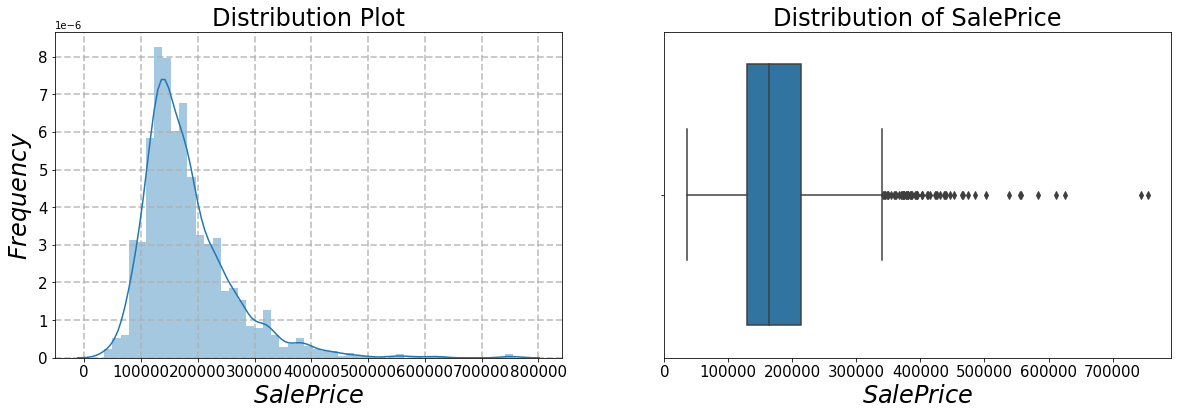

In [50]:
#Plot of target 
fig,ax=plt.subplots(1,2,figsize=(20,6))

#distplot
sns.distplot(train['SalePrice'],ax=ax[0])
ax[0].set_title('Distribution Plot',fontsize=24)
ax[0].set_xlabel(r'$SalePrice$',fontsize=24)
ax[0].set_ylabel(r'$Frequency$',fontsize=24)
ax[0].tick_params(labelsize=15)
ax[0].grid(True, lw=1.75, ls='--',alpha=0.75)

#boxplot
sns.boxplot(train['SalePrice'],ax=ax[1])
ax[1].set_title('Distribution of SalePrice',fontsize=24)
ax[1].set_xlabel(r'$SalePrice$',fontsize=24)
ax[1].tick_params(labelsize=15)



In [51]:
#skew and kurt
print("Skewness:{}".format(train['SalePrice'].skew()))
print("Kurtosis:{}".format(train['SalePrice'].kurt()))

Skewness:1.8828757597682129
Kurtosis:6.536281860064529


The above plots shows that the distribution is right skewed. Data needs to be transorfmed to normal distribution by using log. Also, there are outliers but needs to be checked upon to ensure useful data is not lost. However, it can be assumed that rows having Saleprice > 700000 can be removed.

In [0]:
#removing  extreme right outliers from data
train=train[train['SalePrice']<700000]

Text(0.5, 1.0, 'SalePrice Distribution')

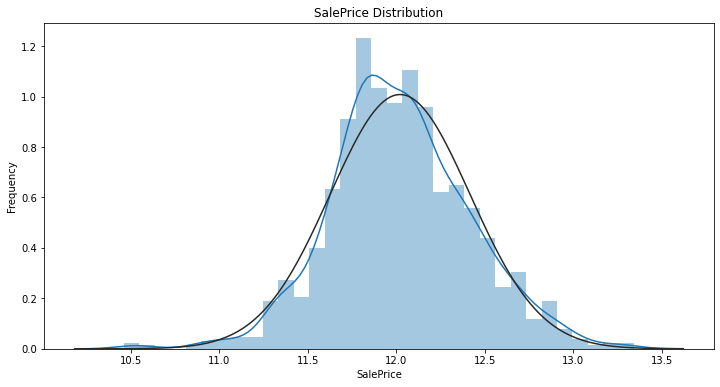

In [53]:
#Log Transforamtion
train['SalePrice']=np.log1p(train['SalePrice'])

plt.figure(figsize=(12,6))
sns.distplot(train['SalePrice'], fit=norm);
plt.ylabel('Frequency')
plt.title('SalePrice Distribution')

## **Train data columns**

In [54]:
train.shape

(1458, 81)

In [55]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


##Numerical Features

In [56]:
#numerical columns
numerical_col=train._get_numeric_data().columns
numerical_col=numerical_col.drop(['Id','SalePrice'])
numerical_col

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold',
       'YrSold'],
      dtype='object')

### PLOT

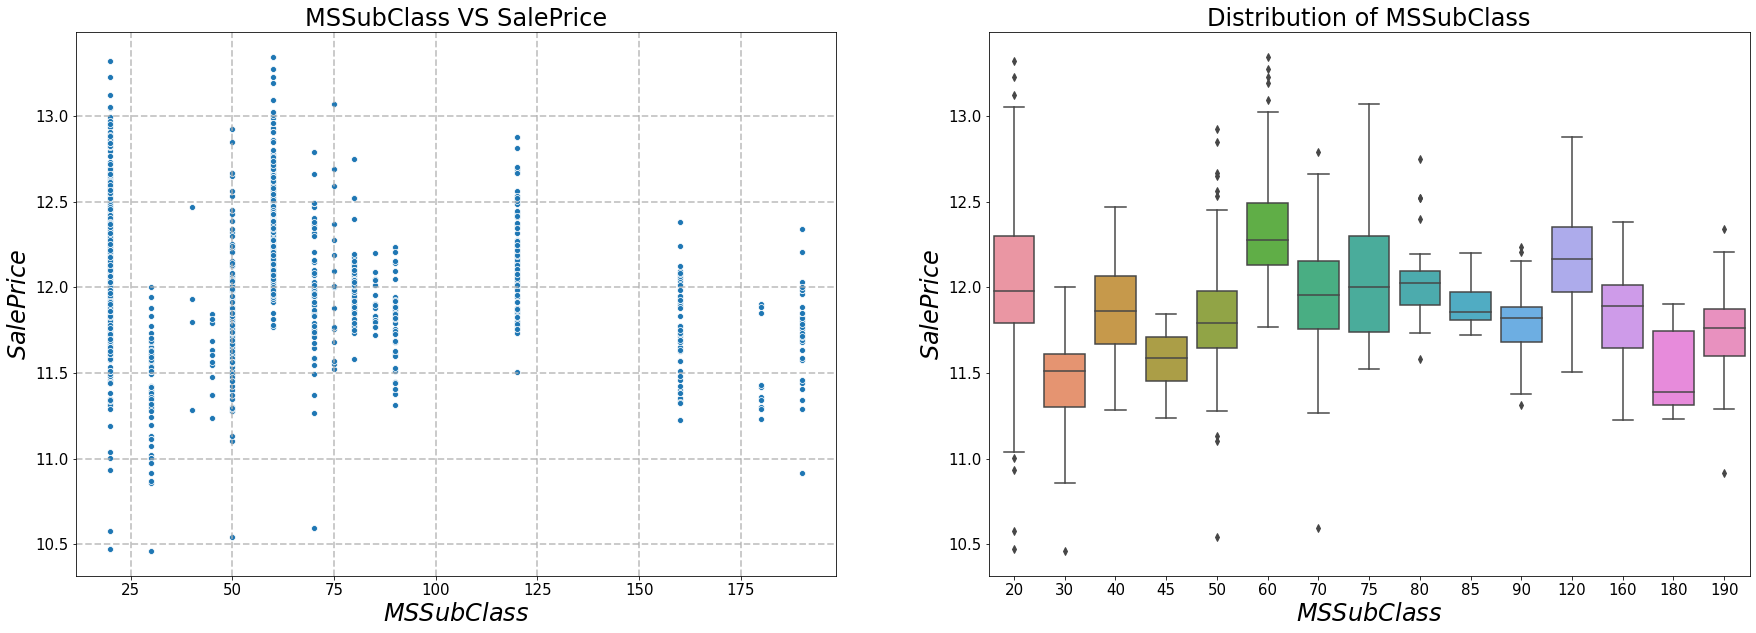

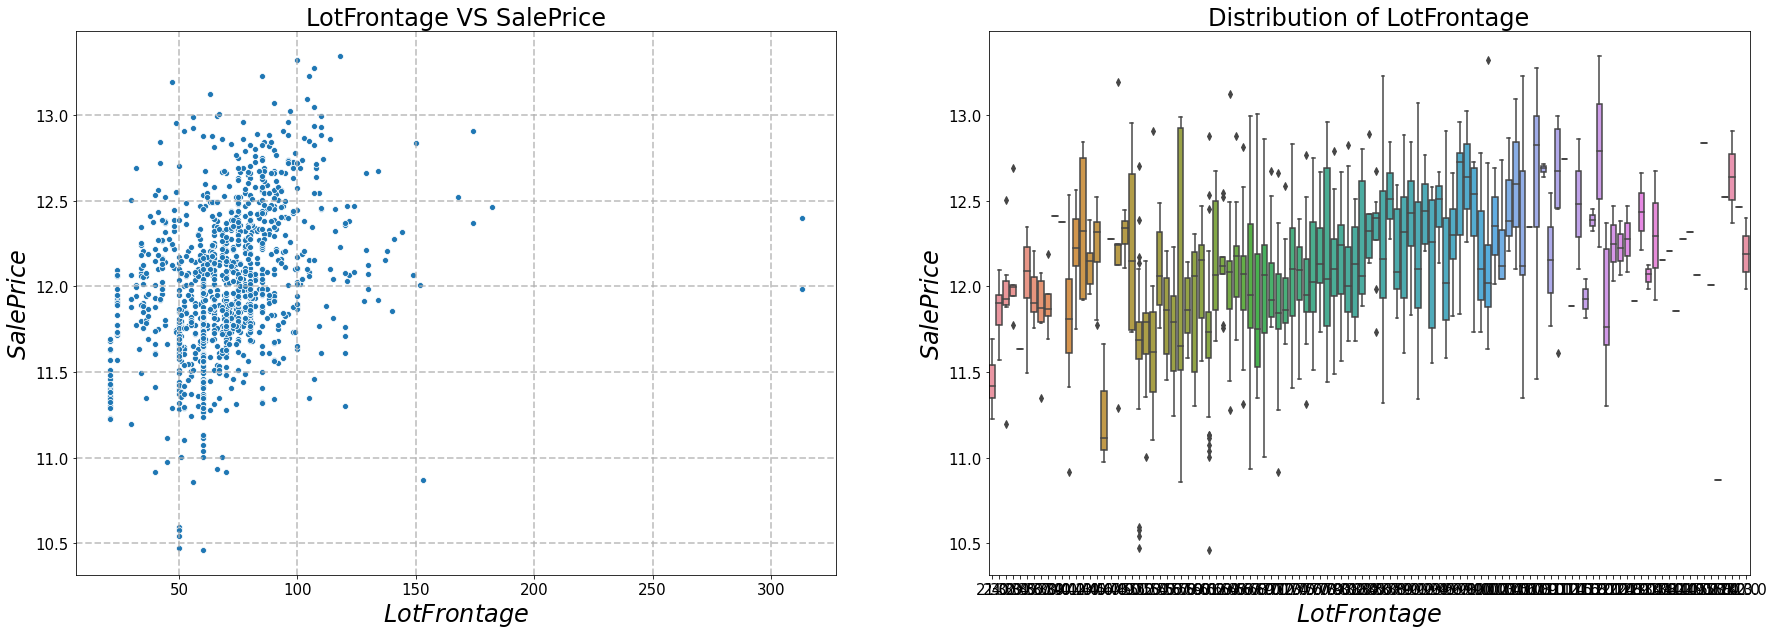

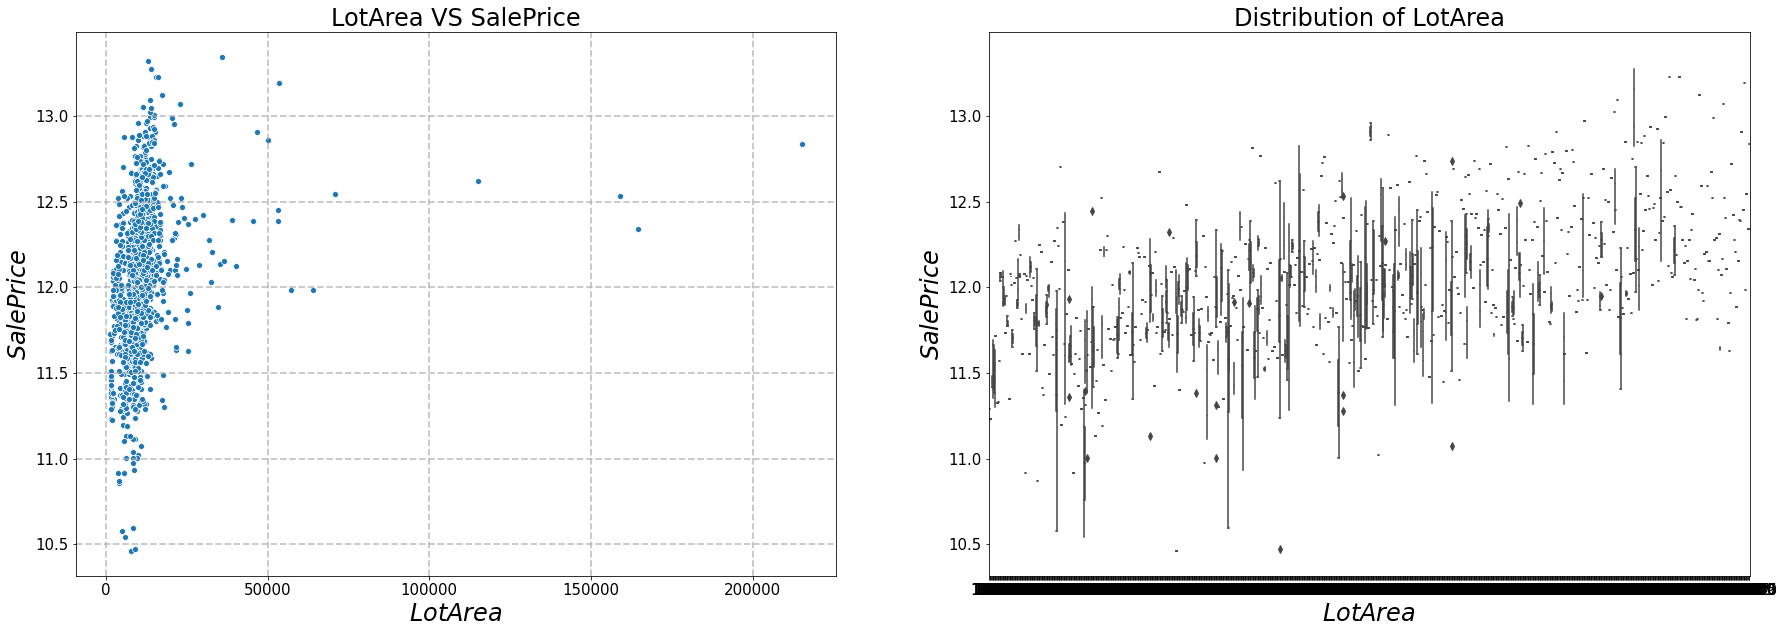

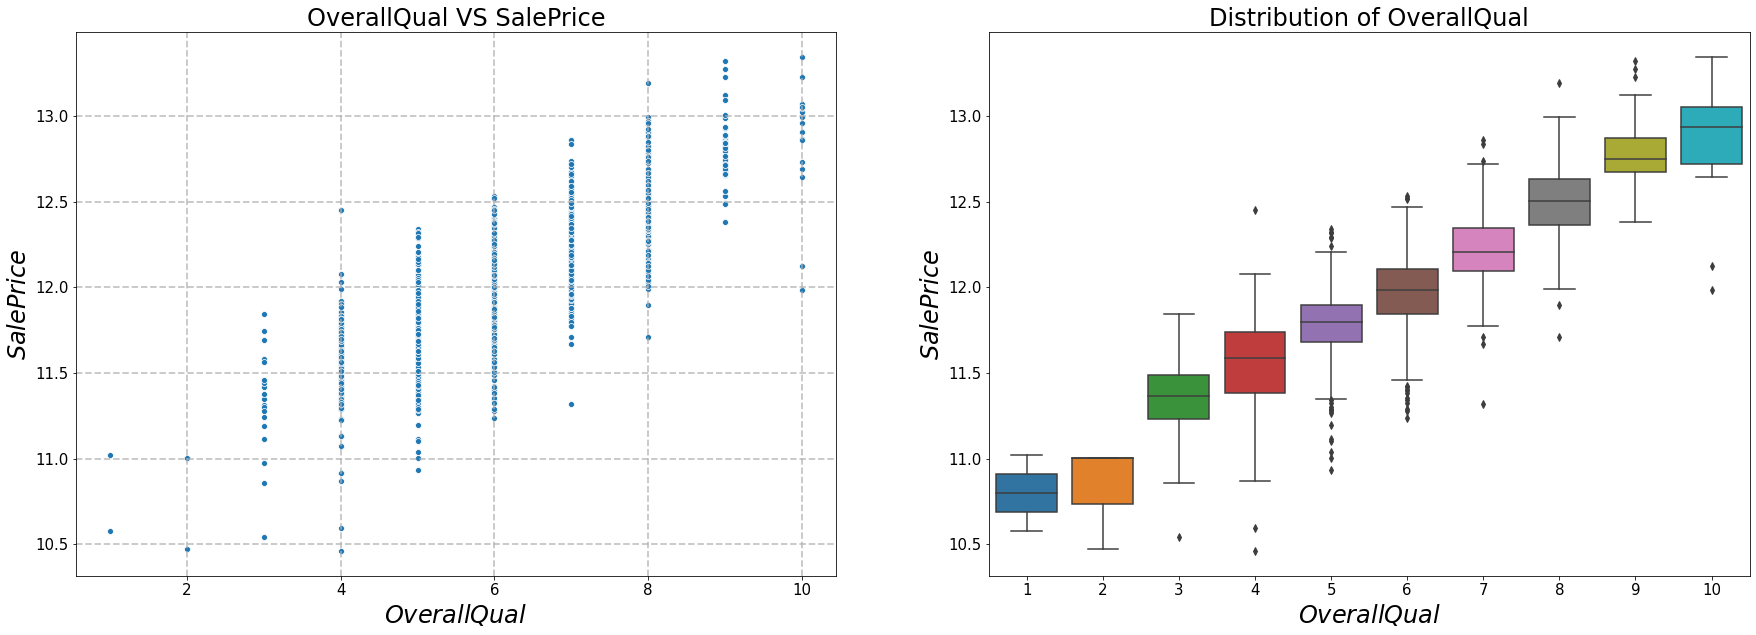

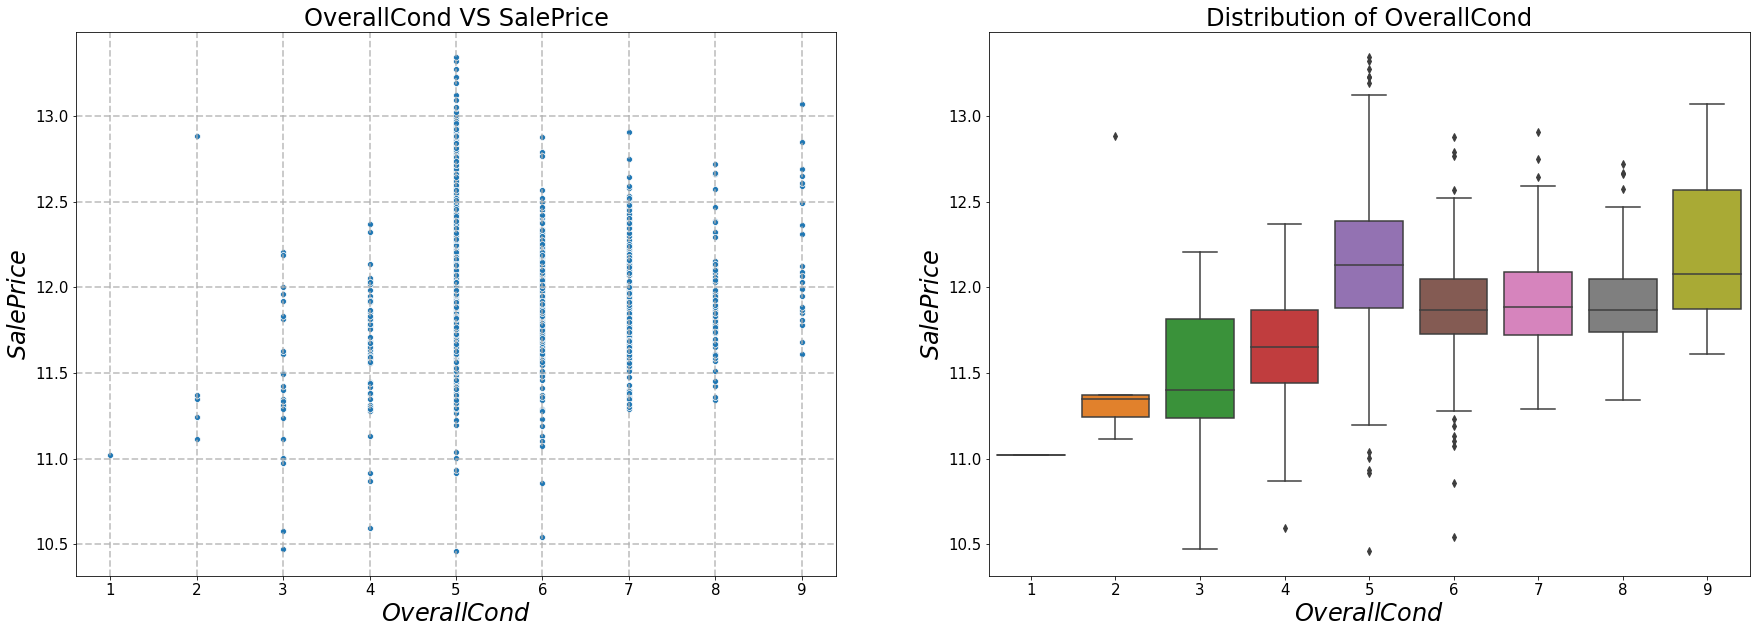

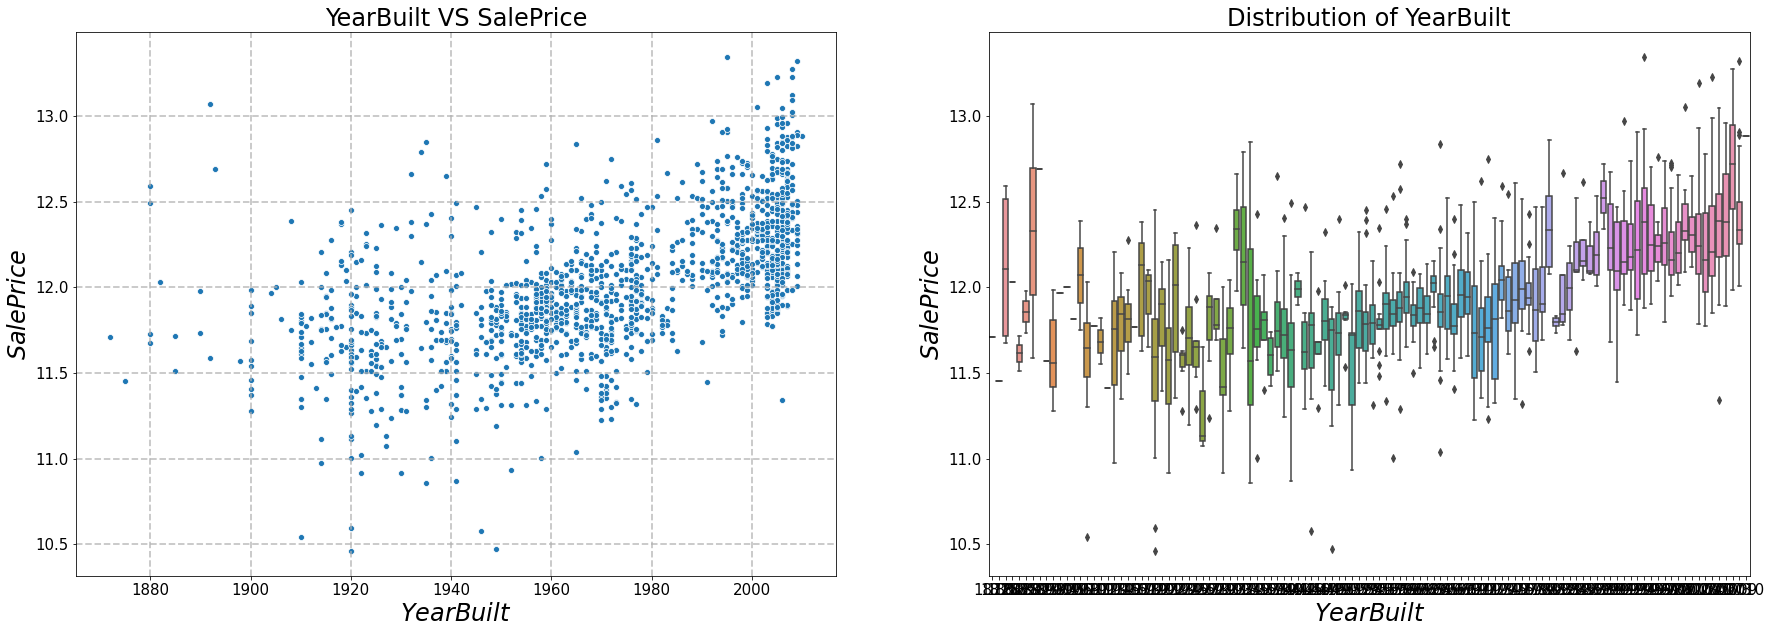

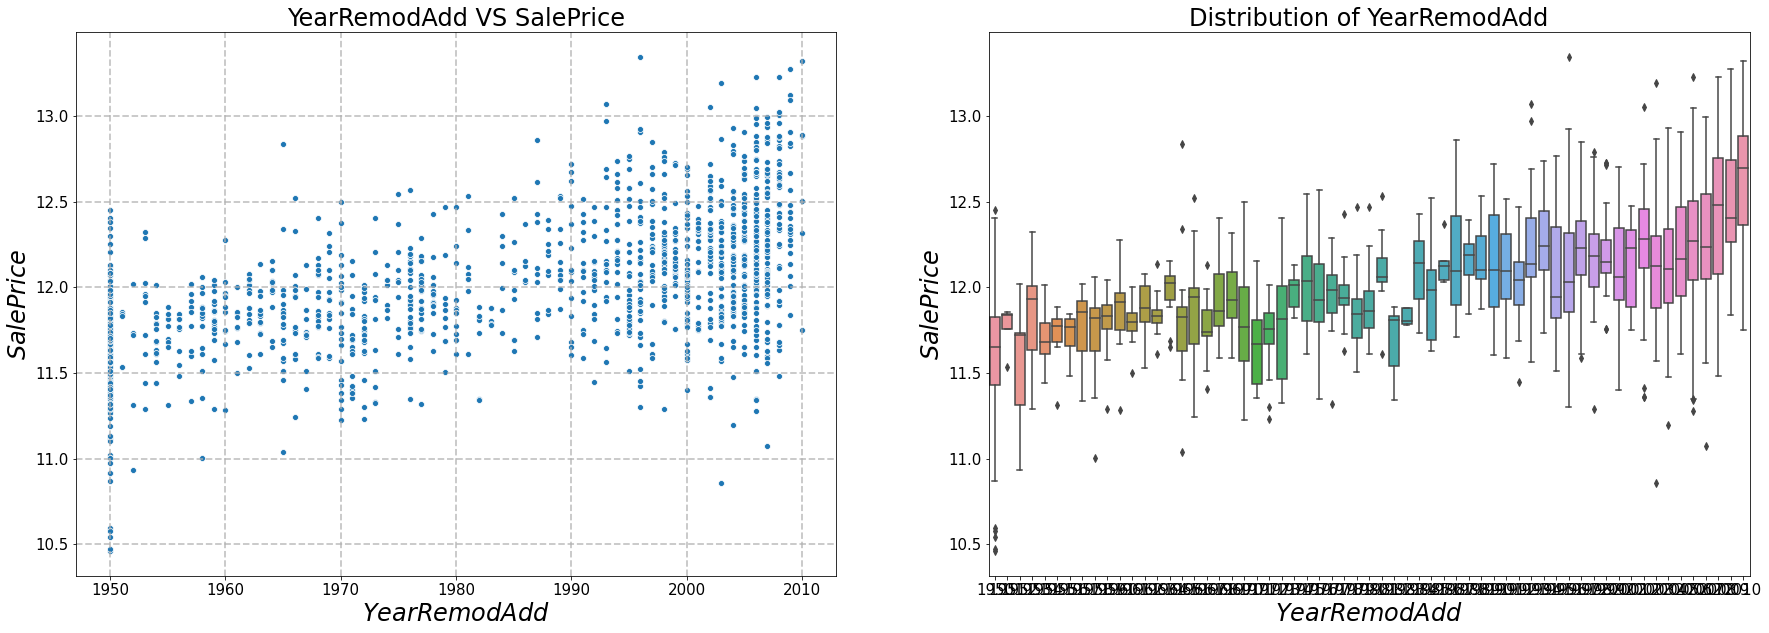

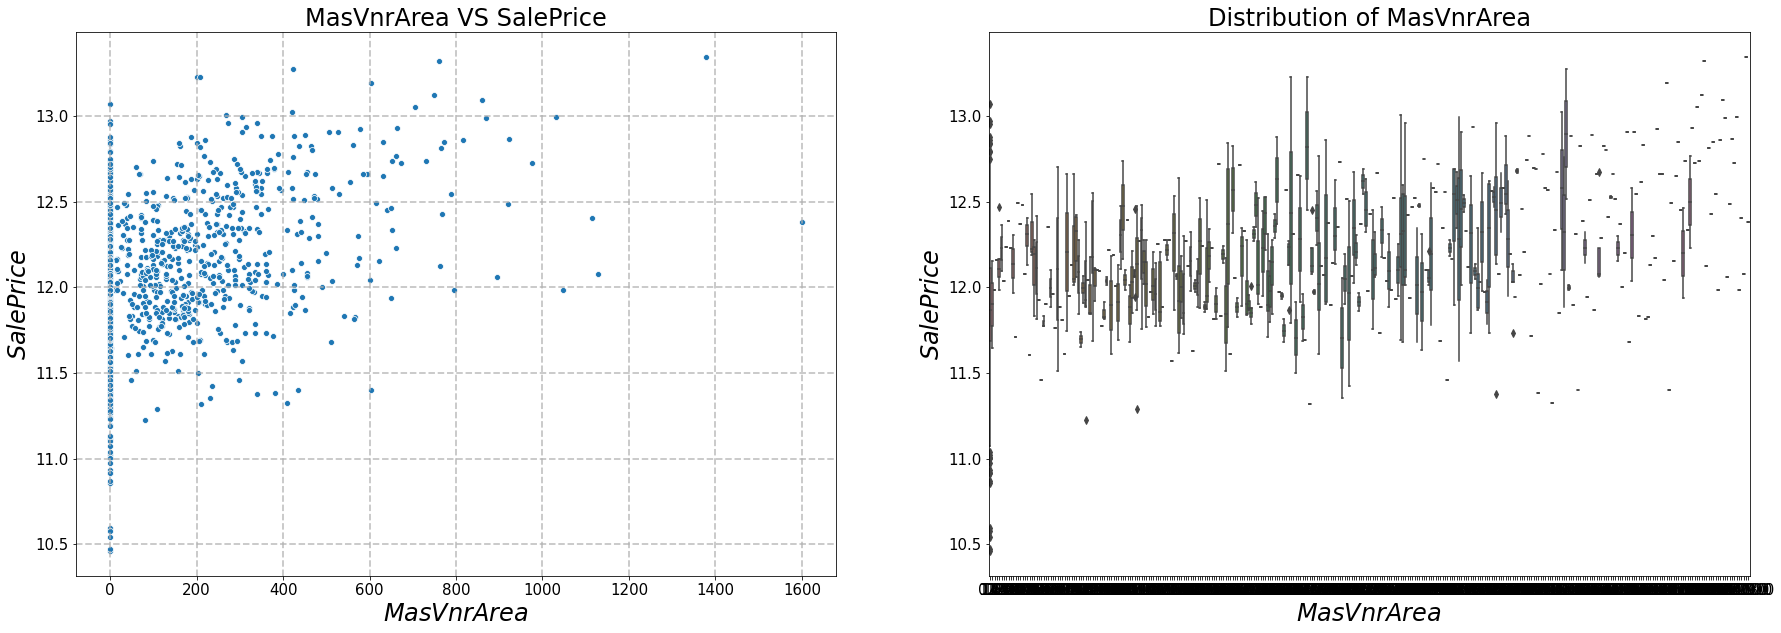

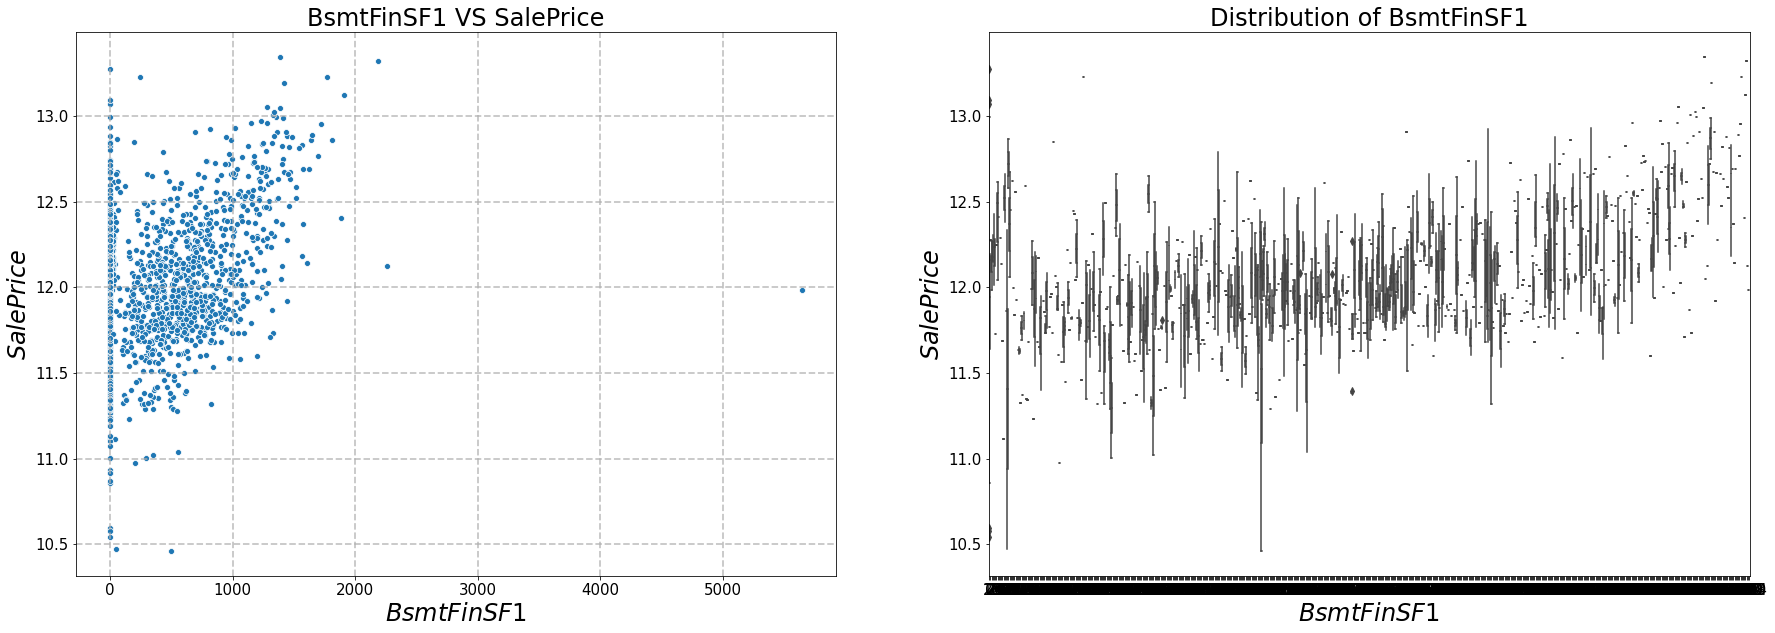

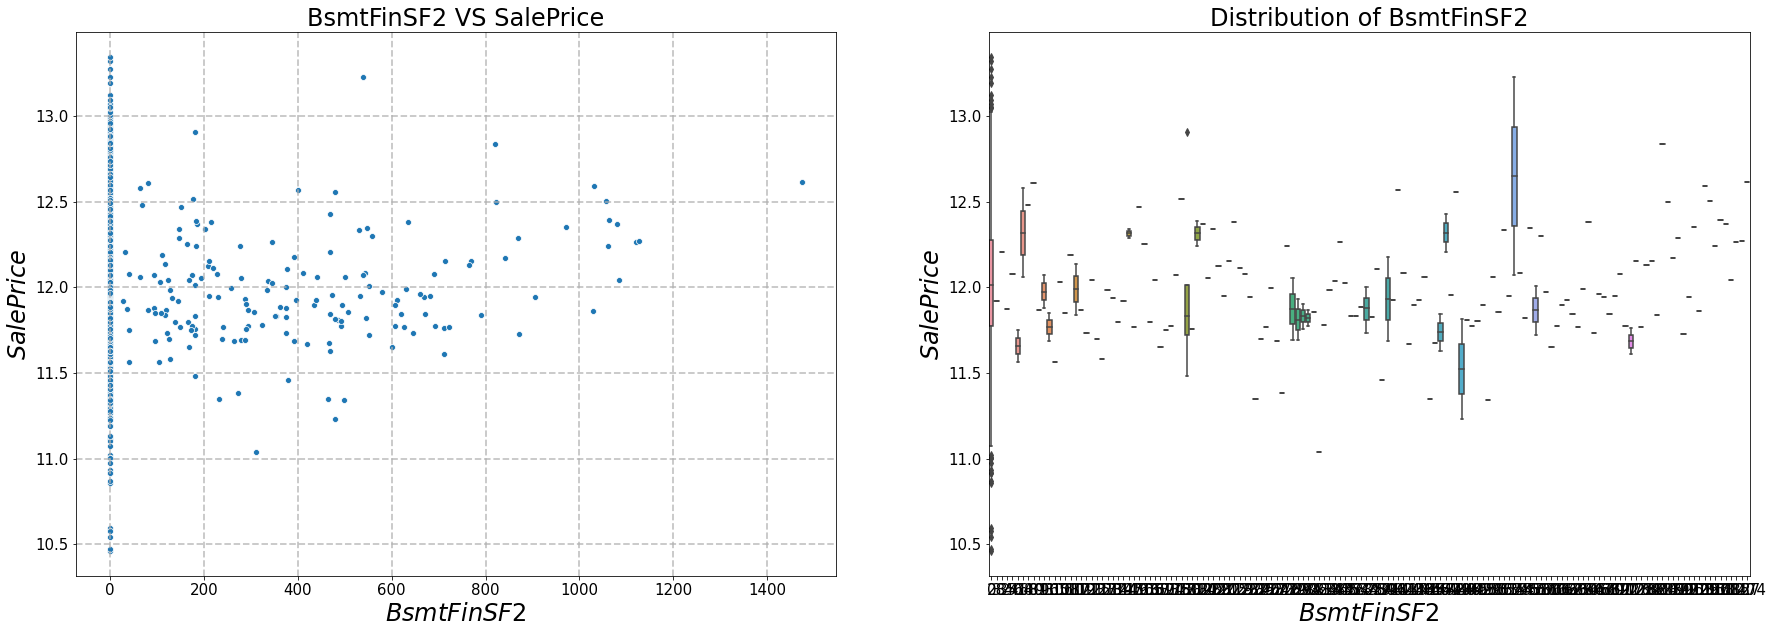

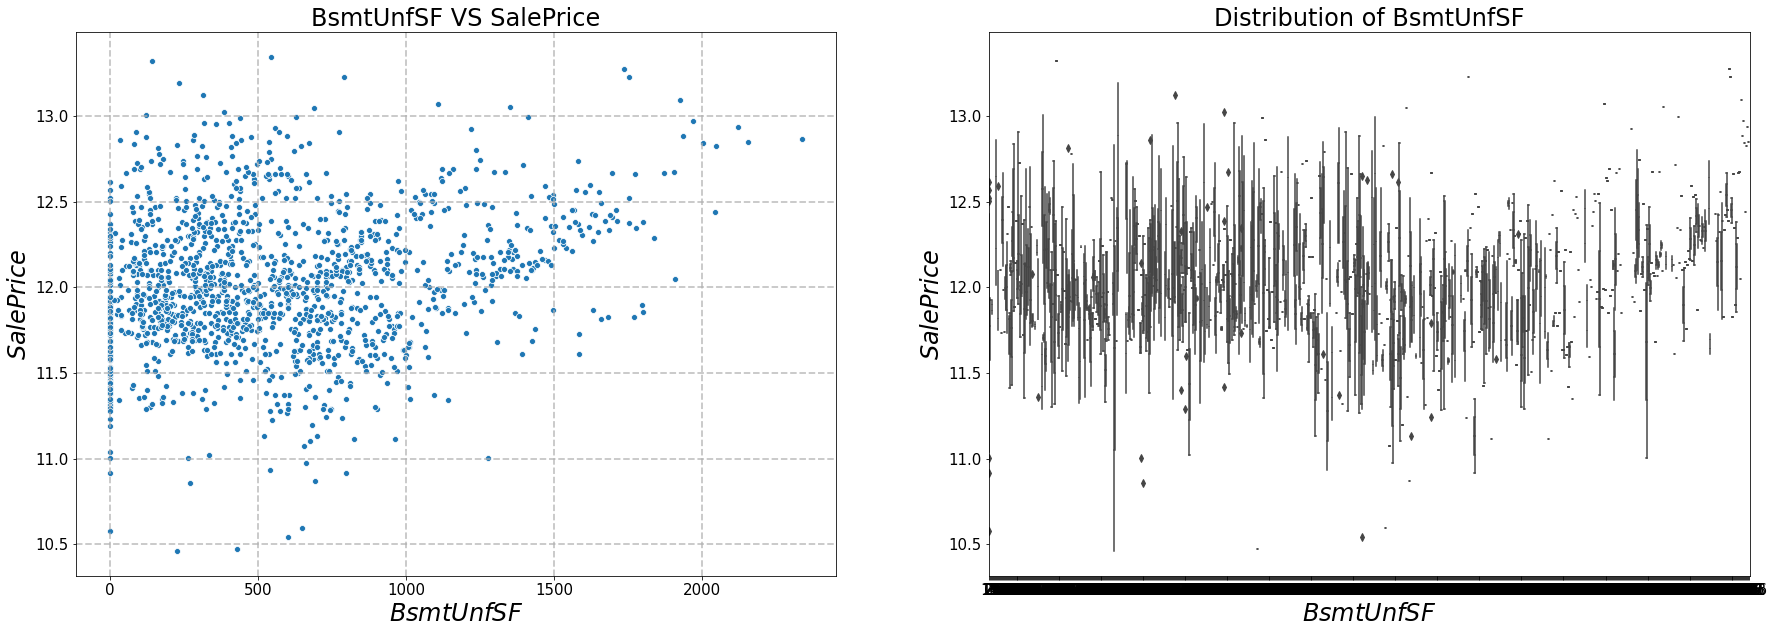

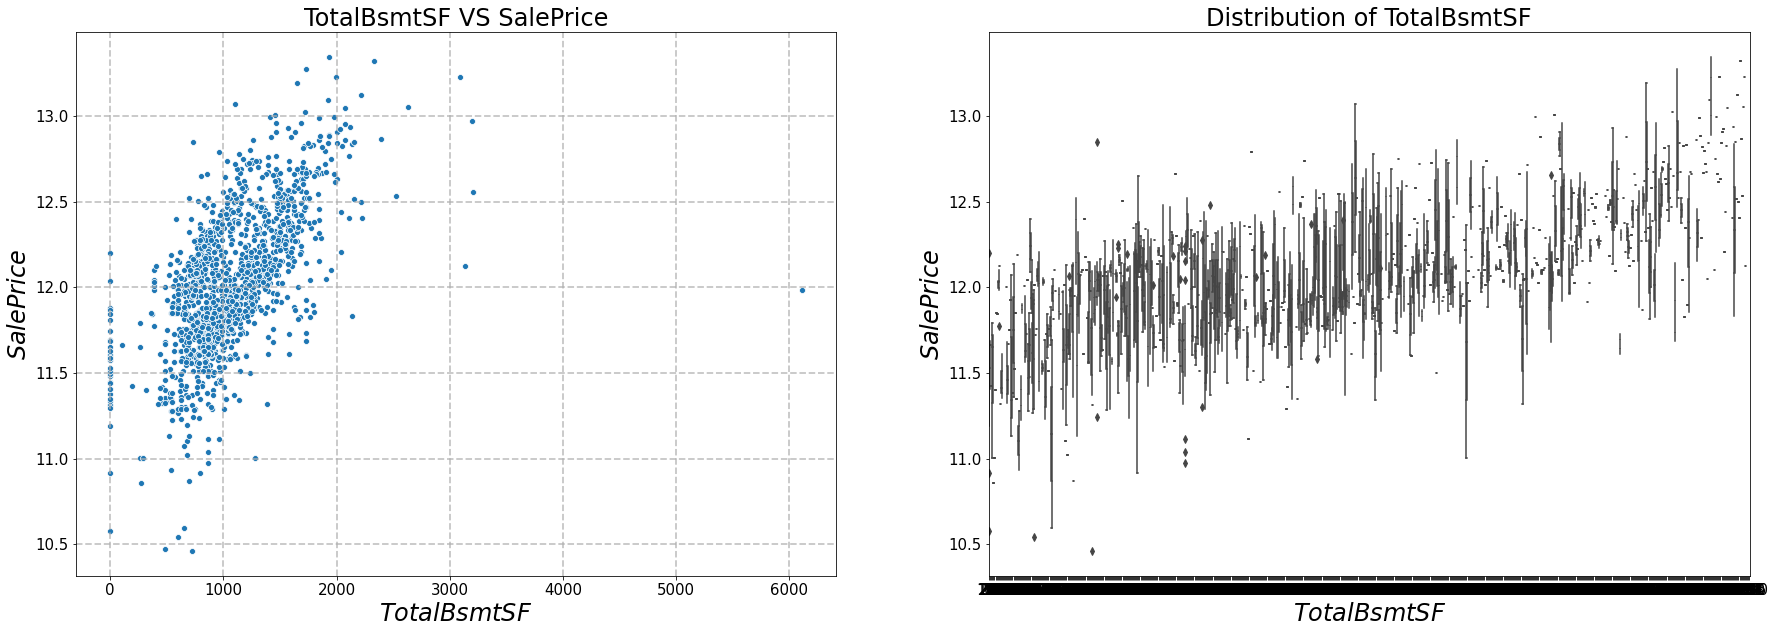

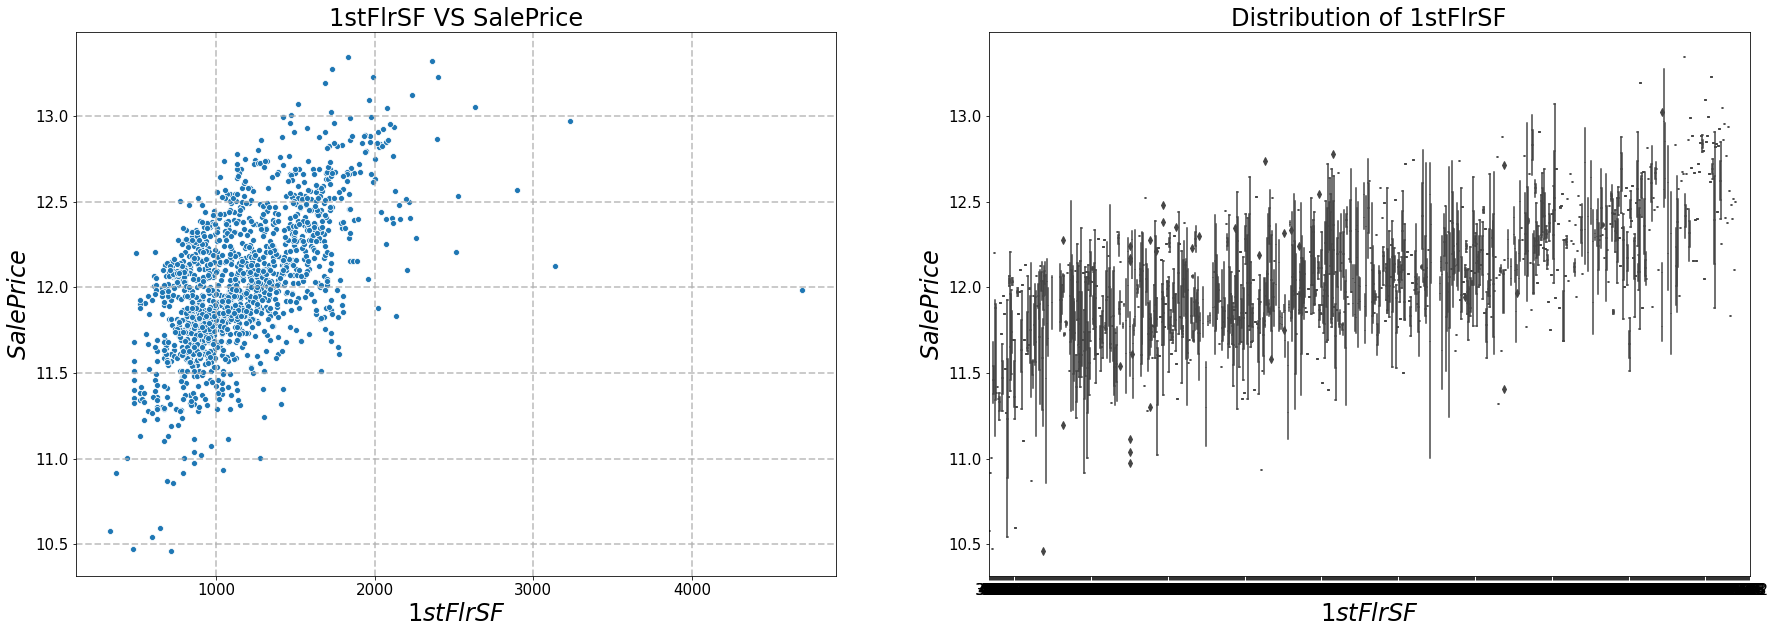

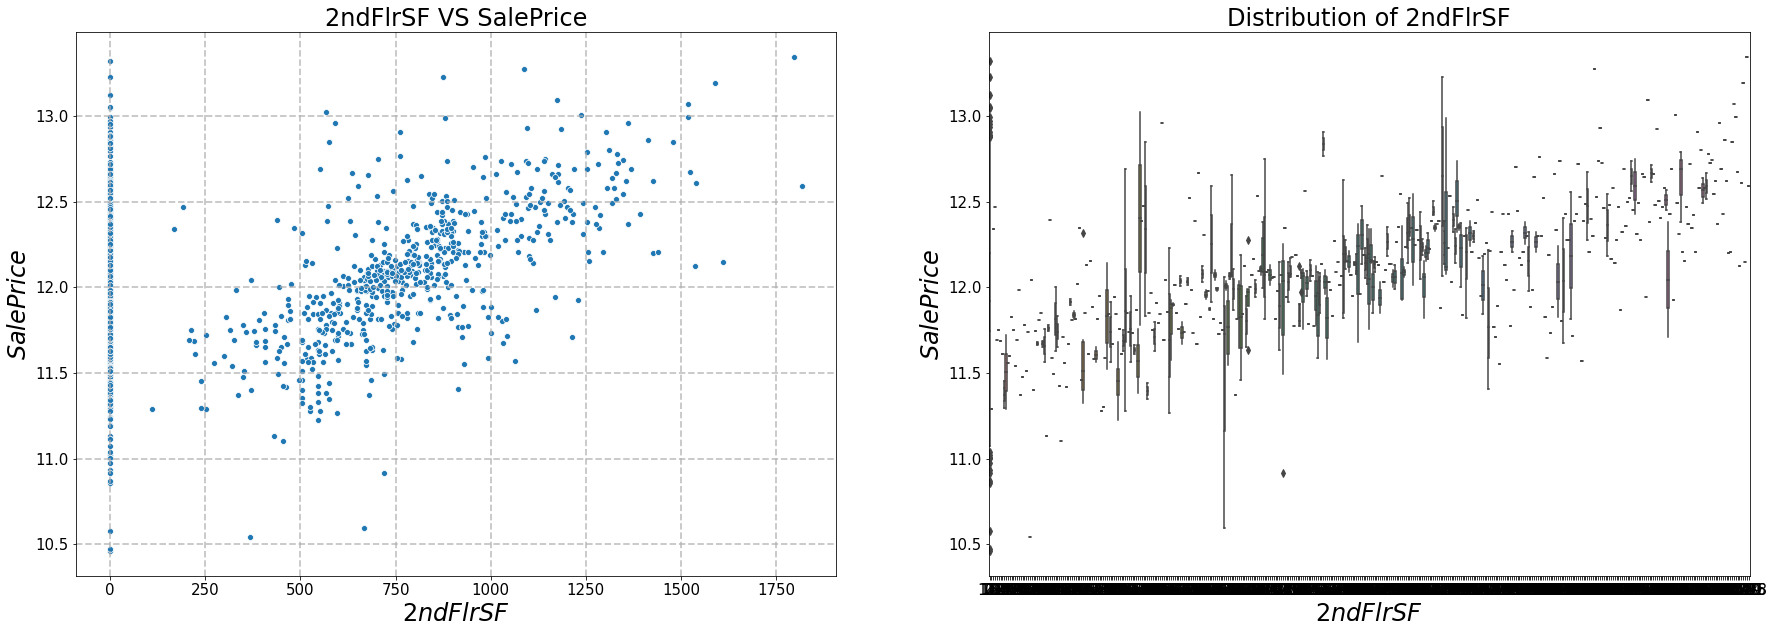

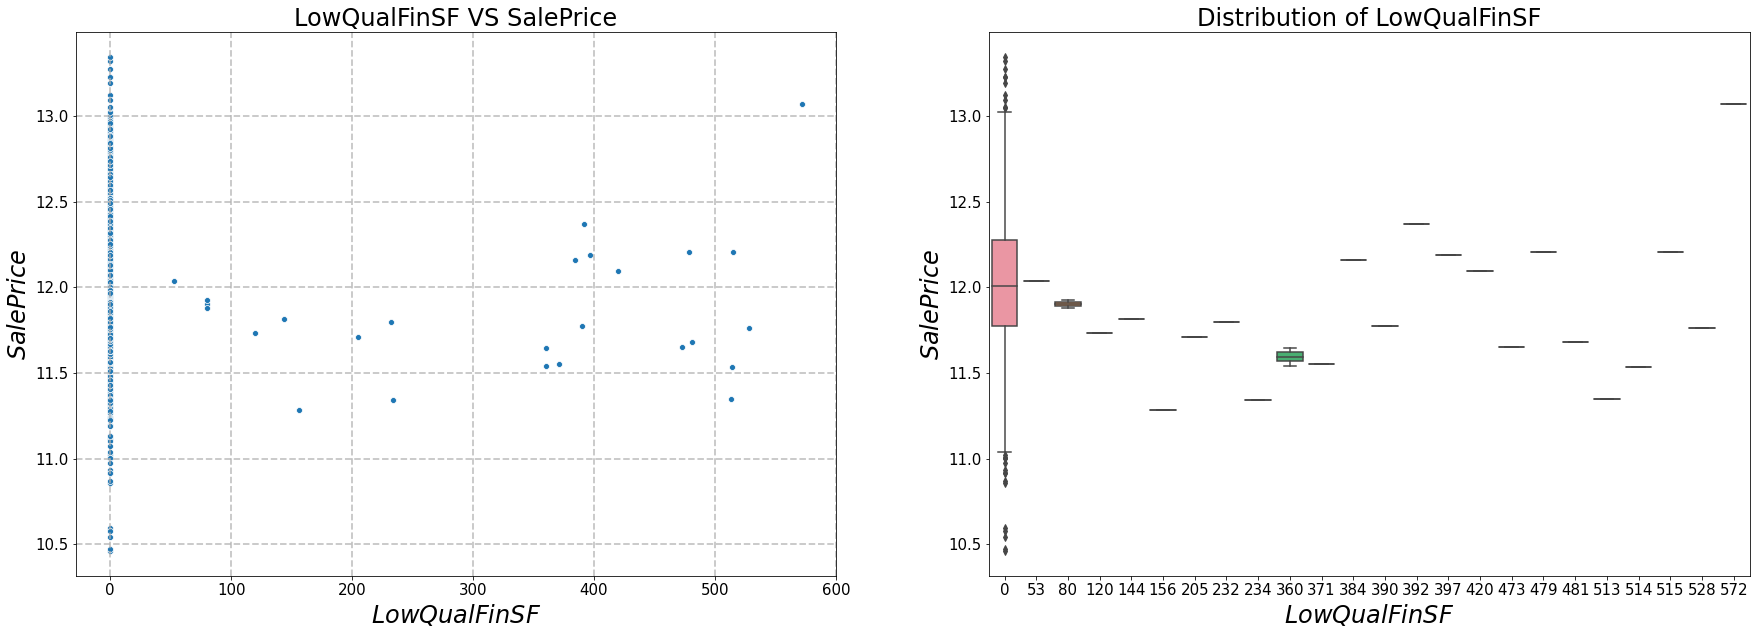

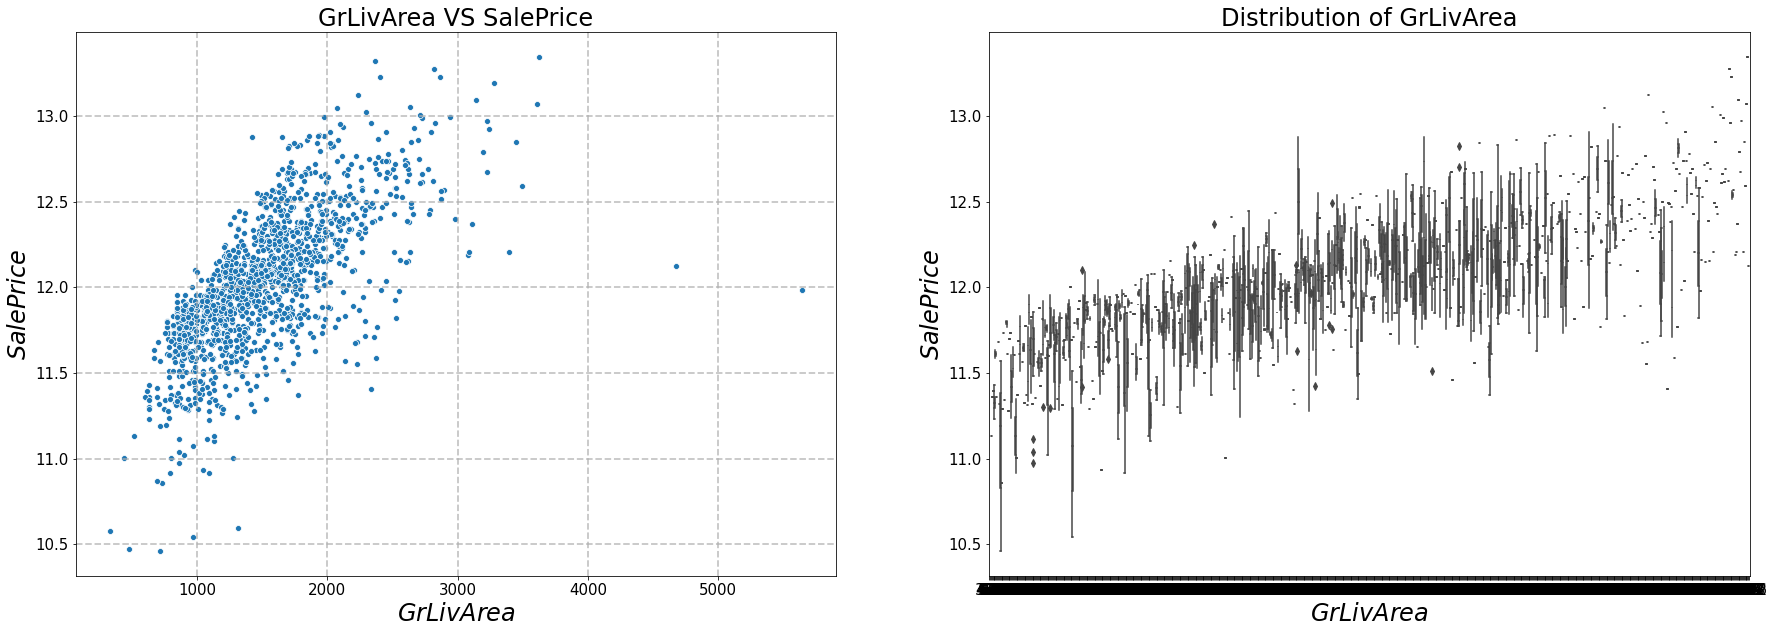

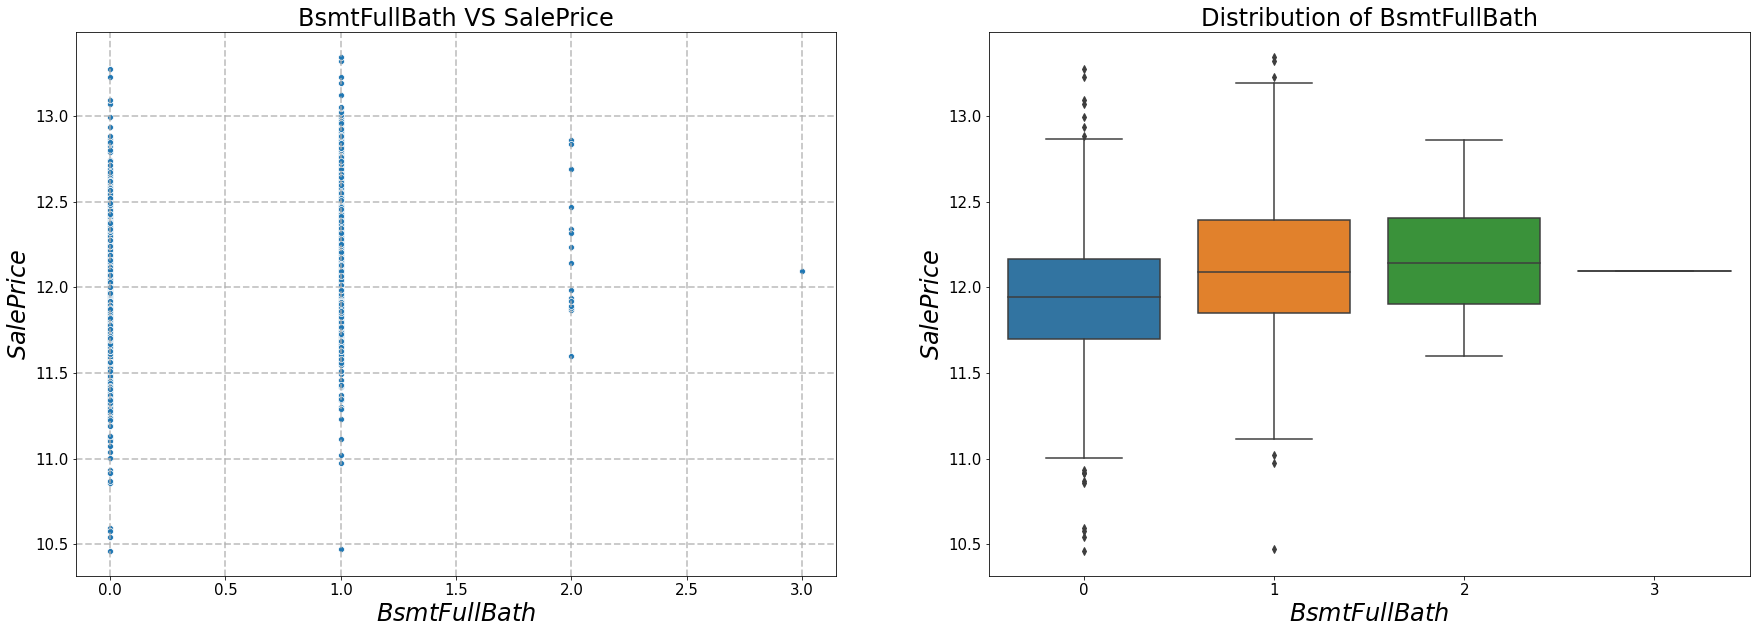

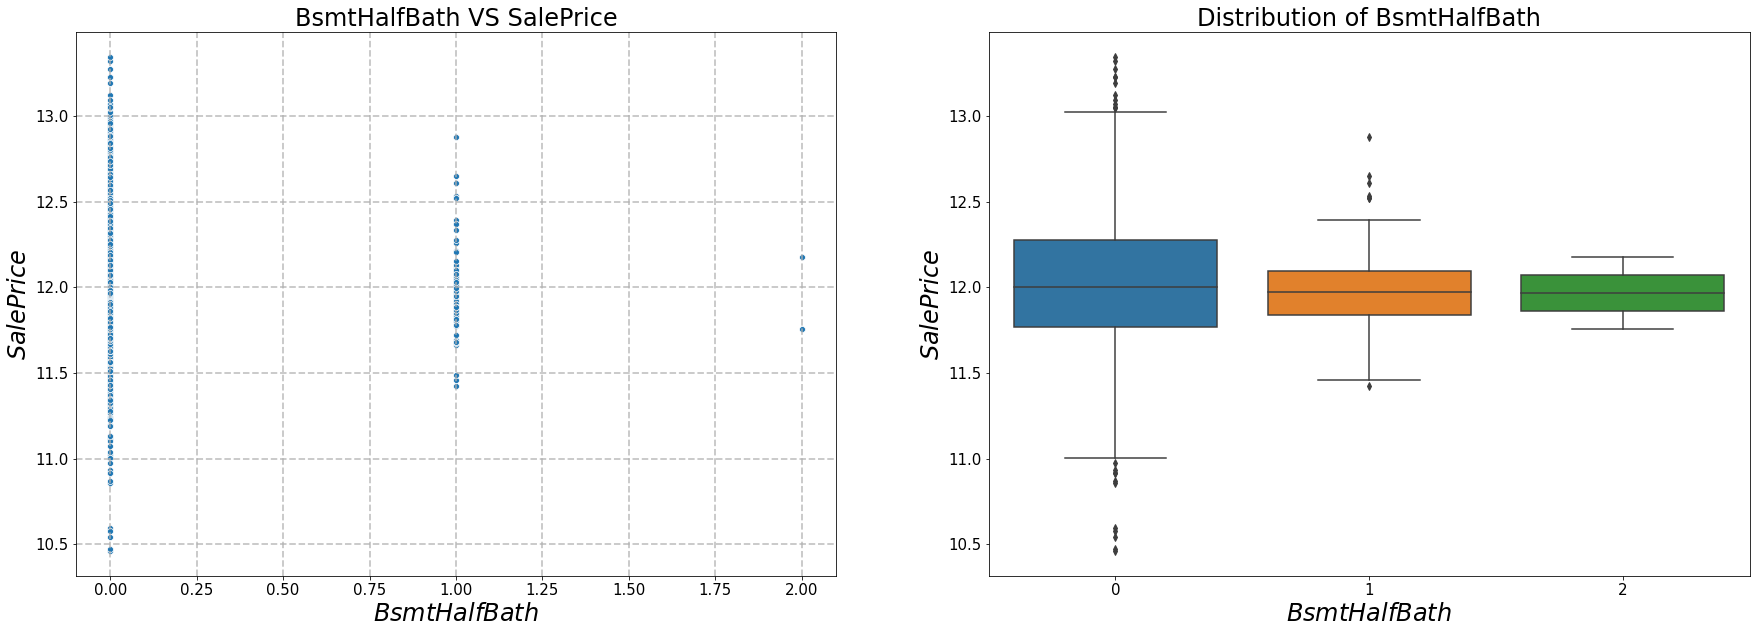

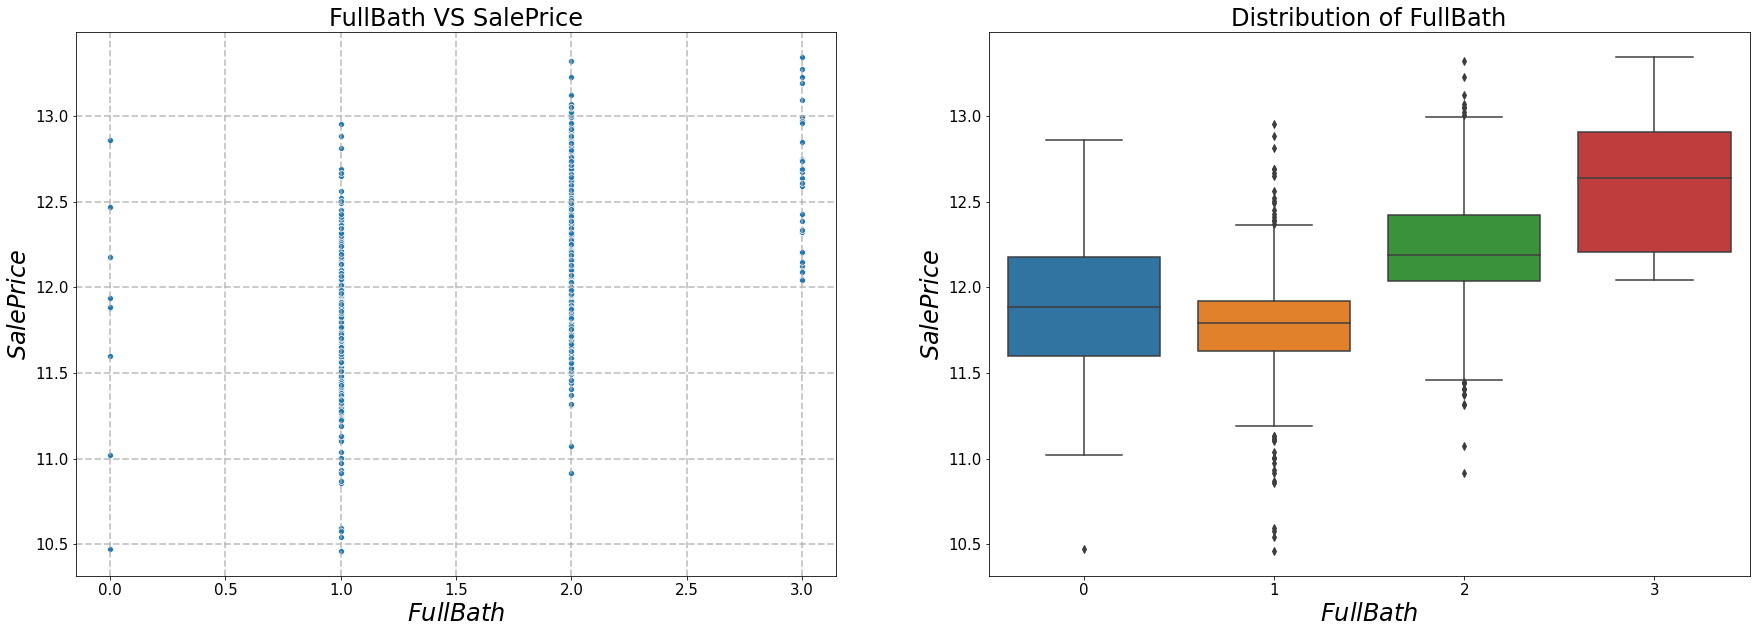

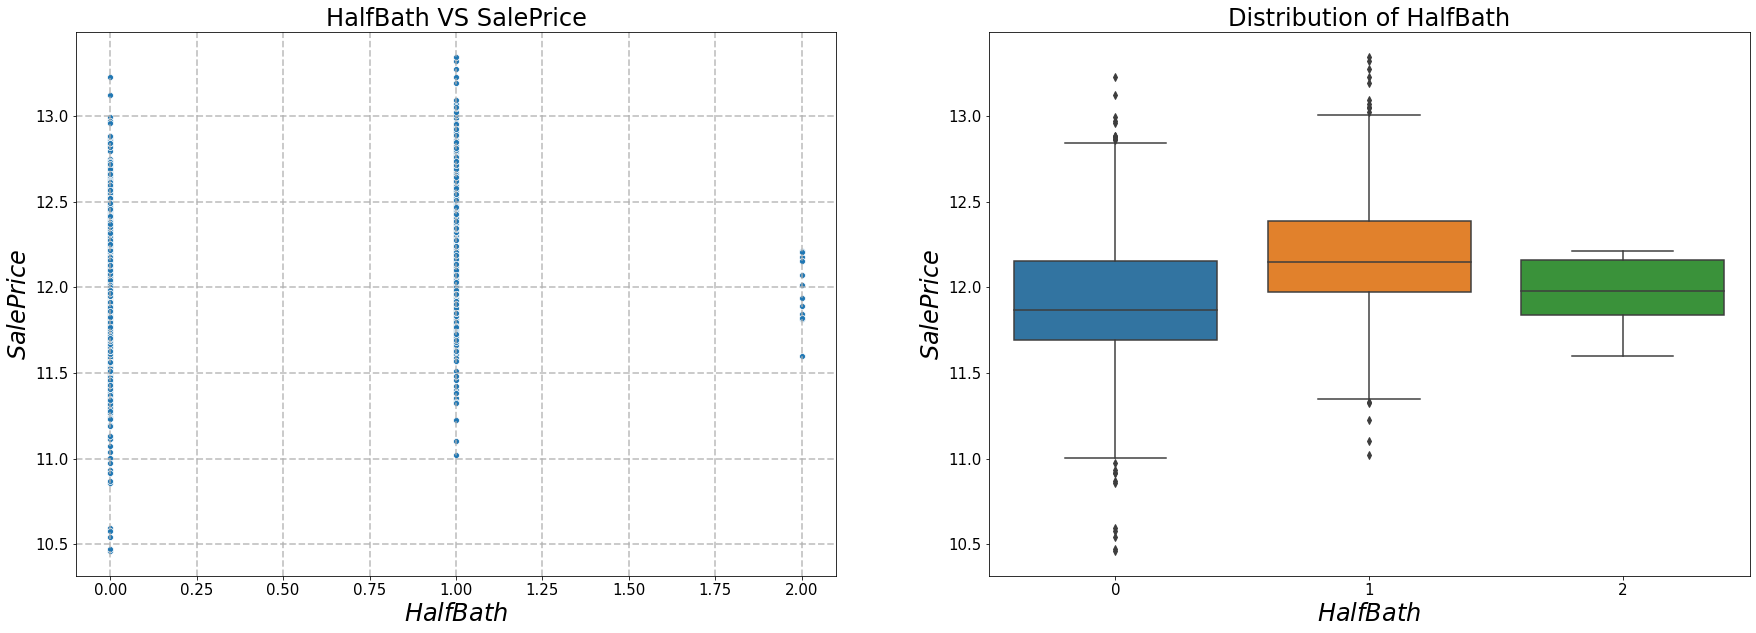

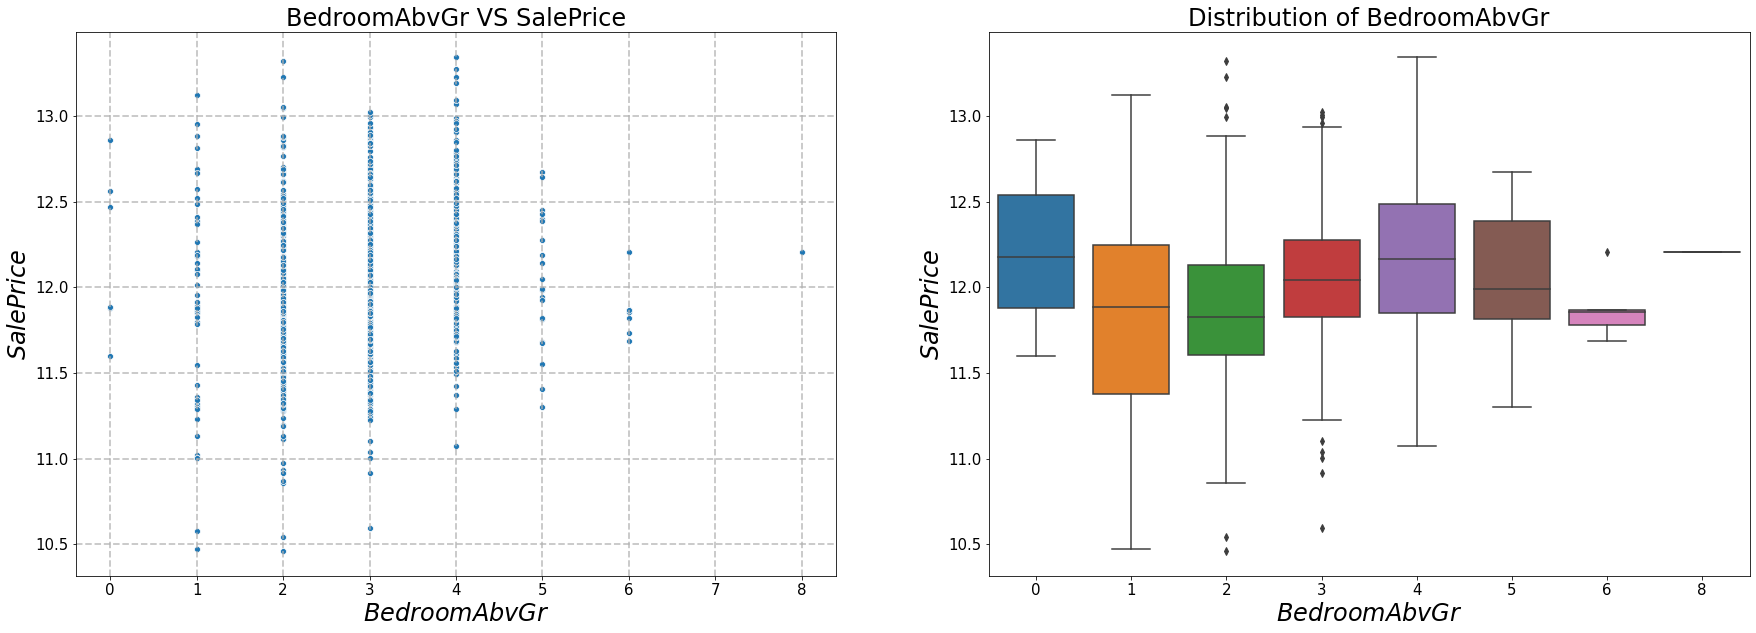

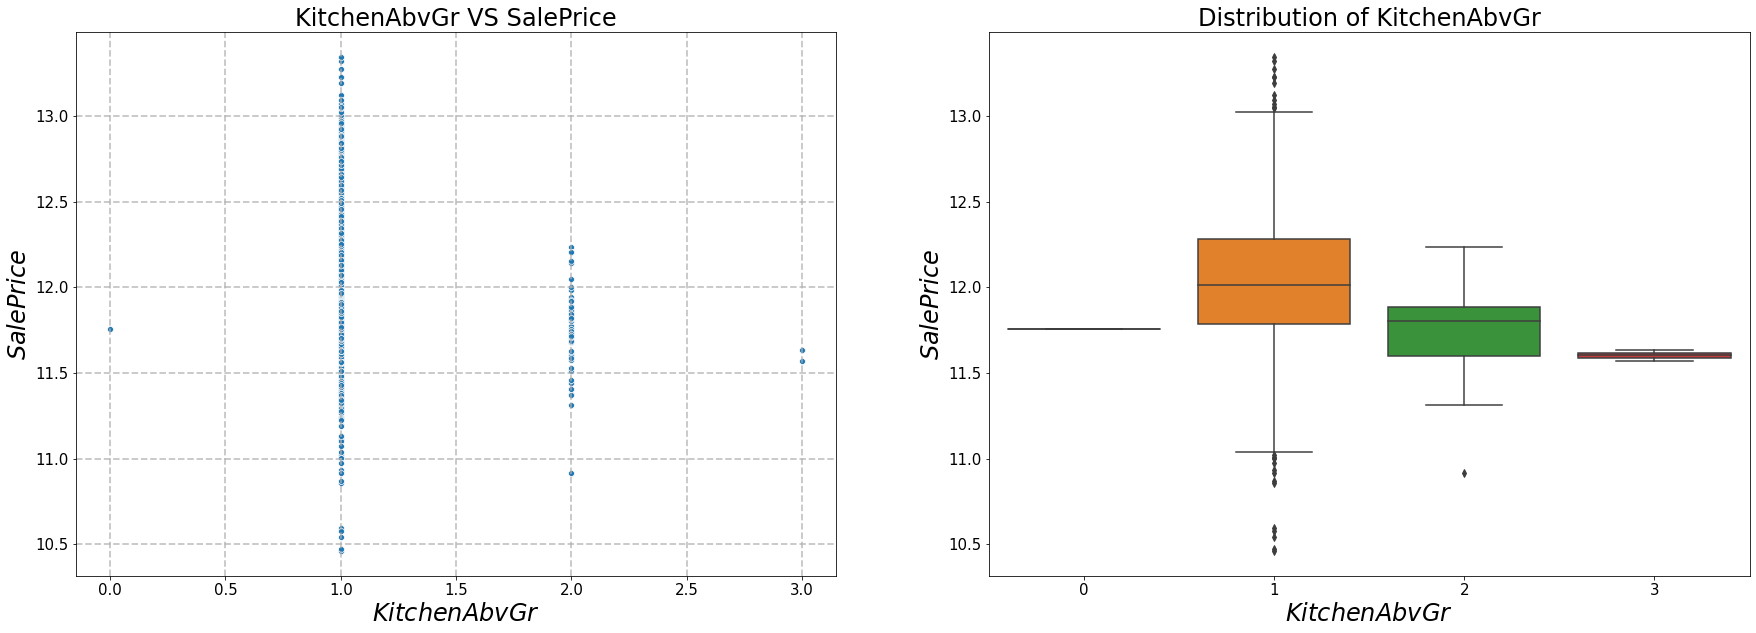

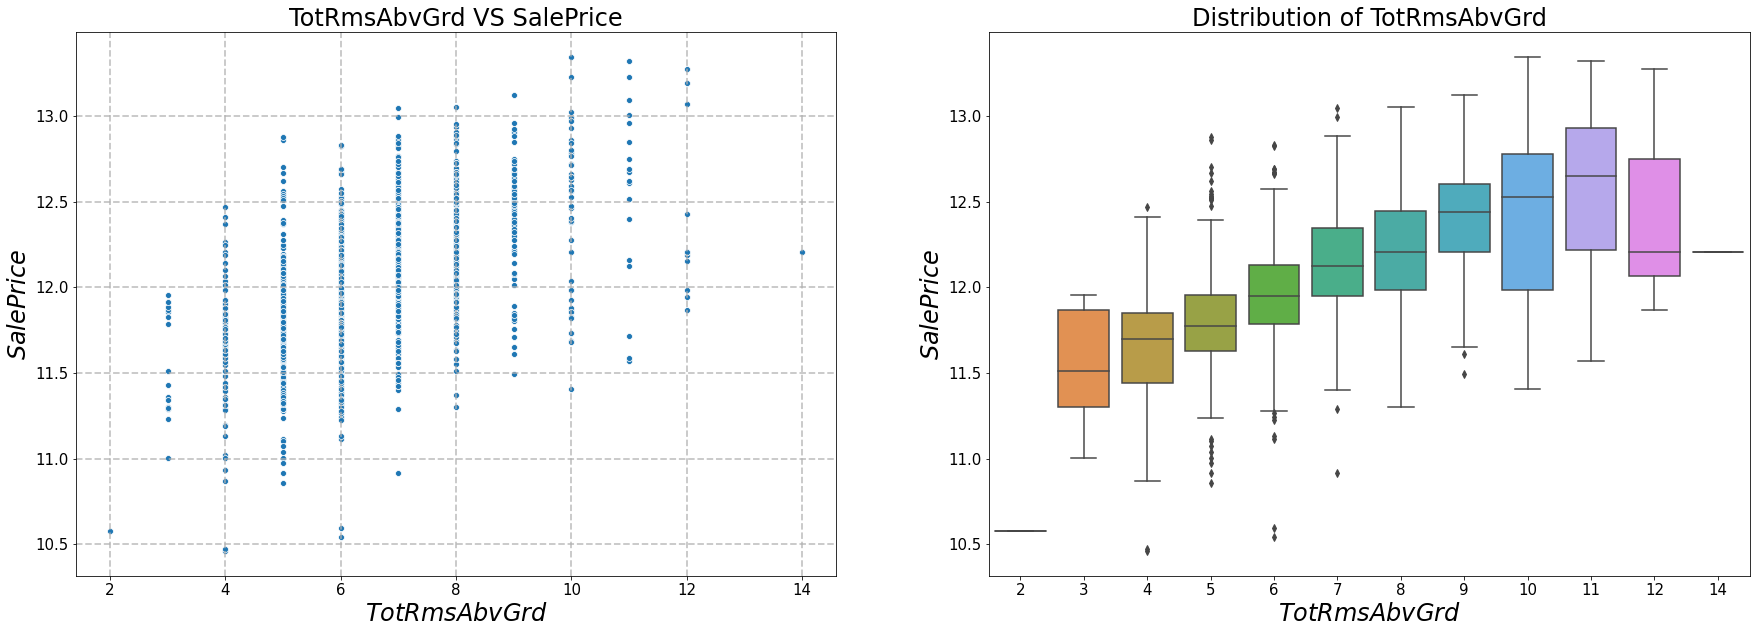

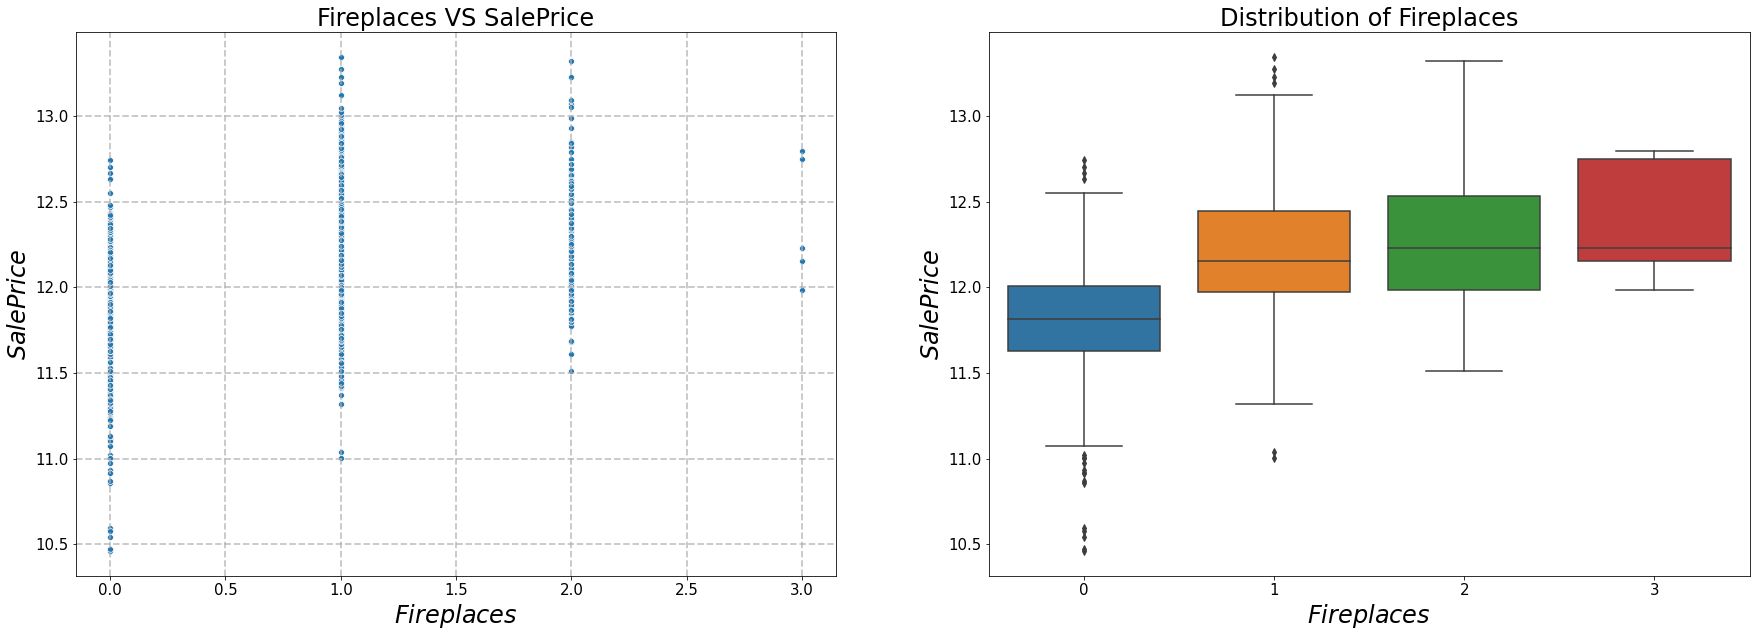

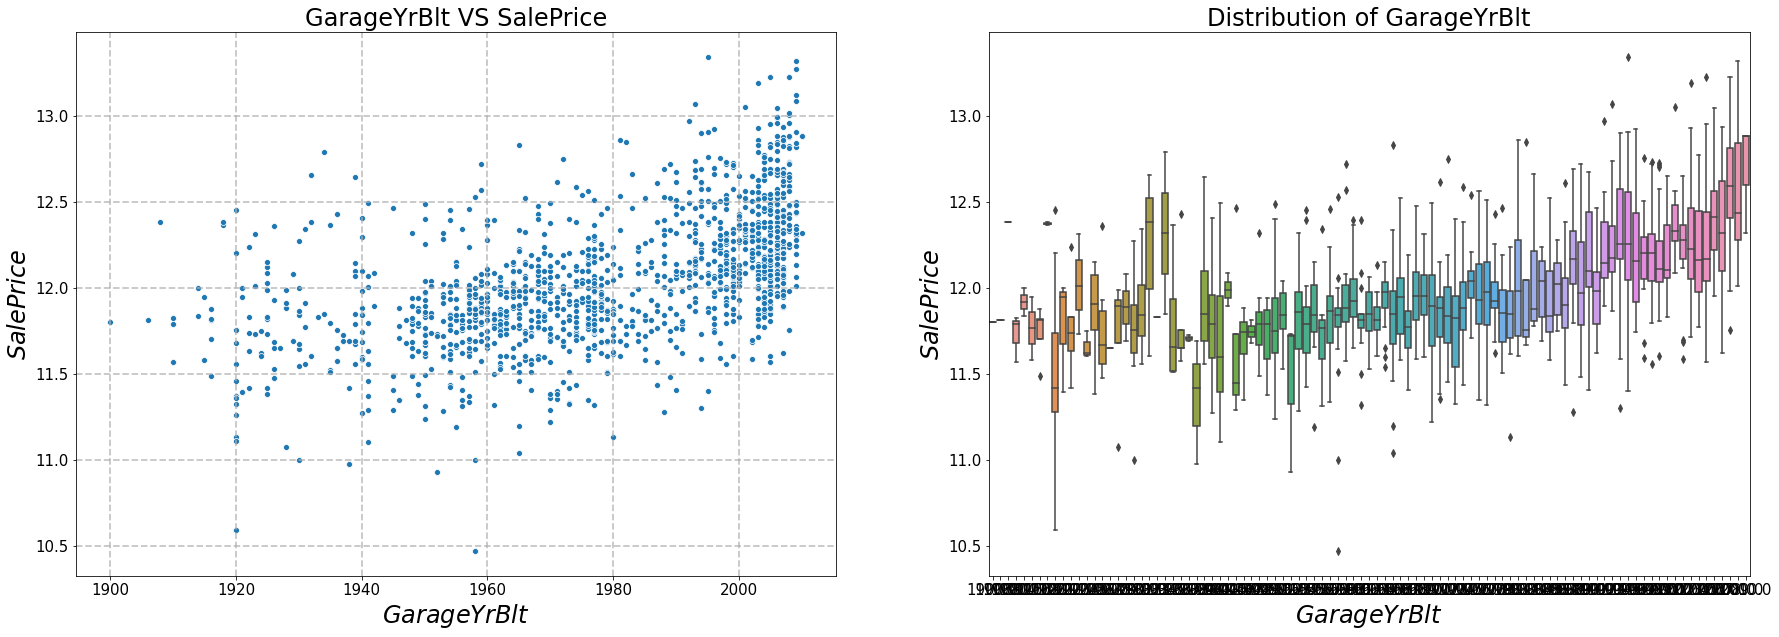

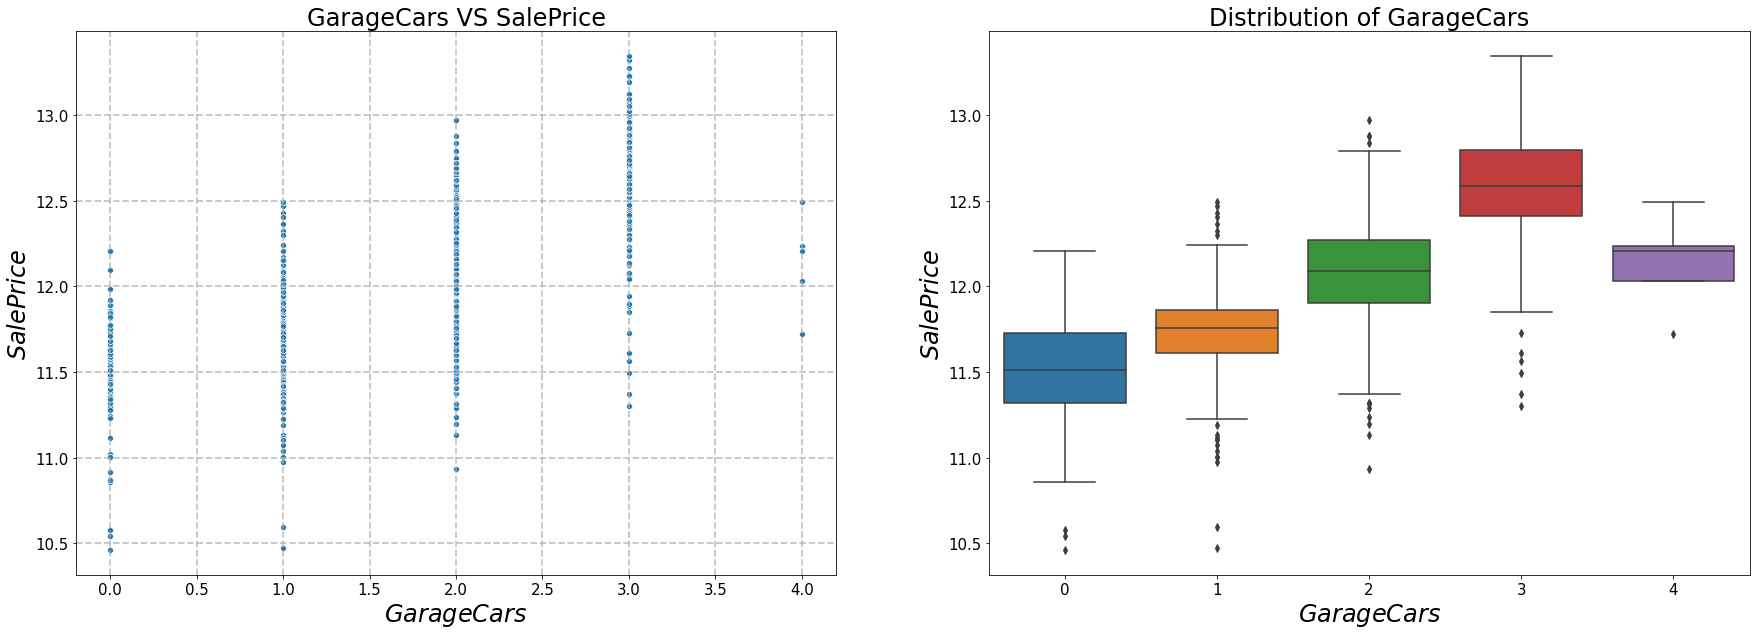

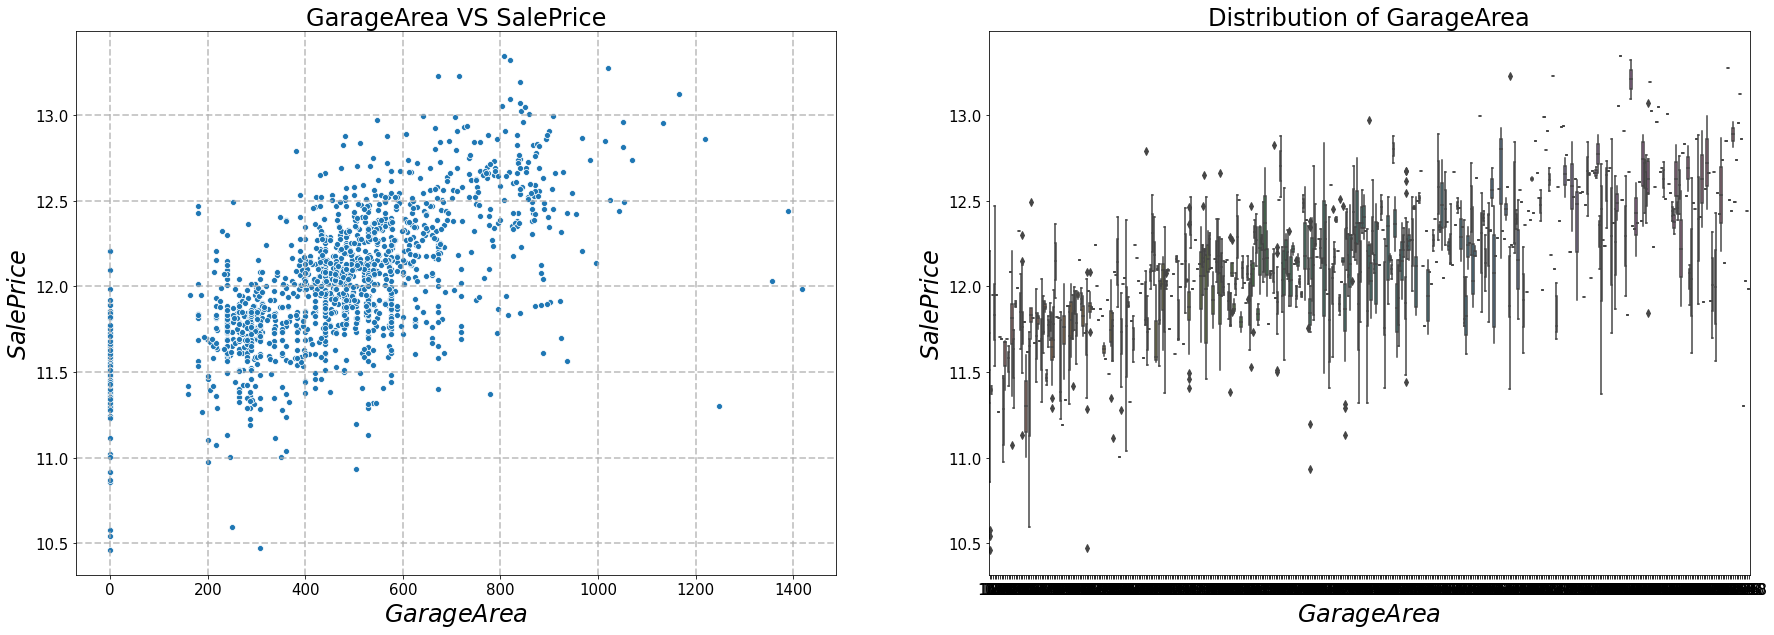

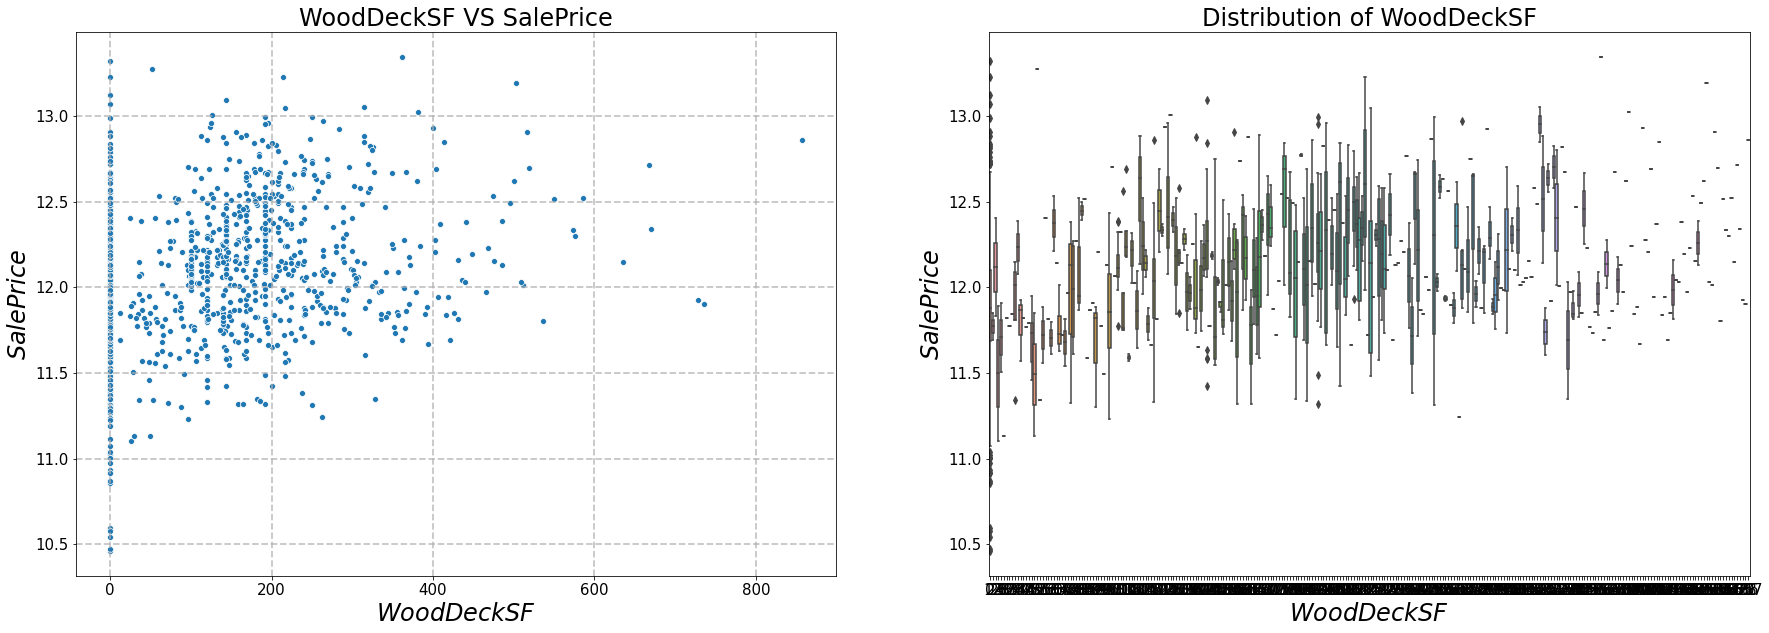

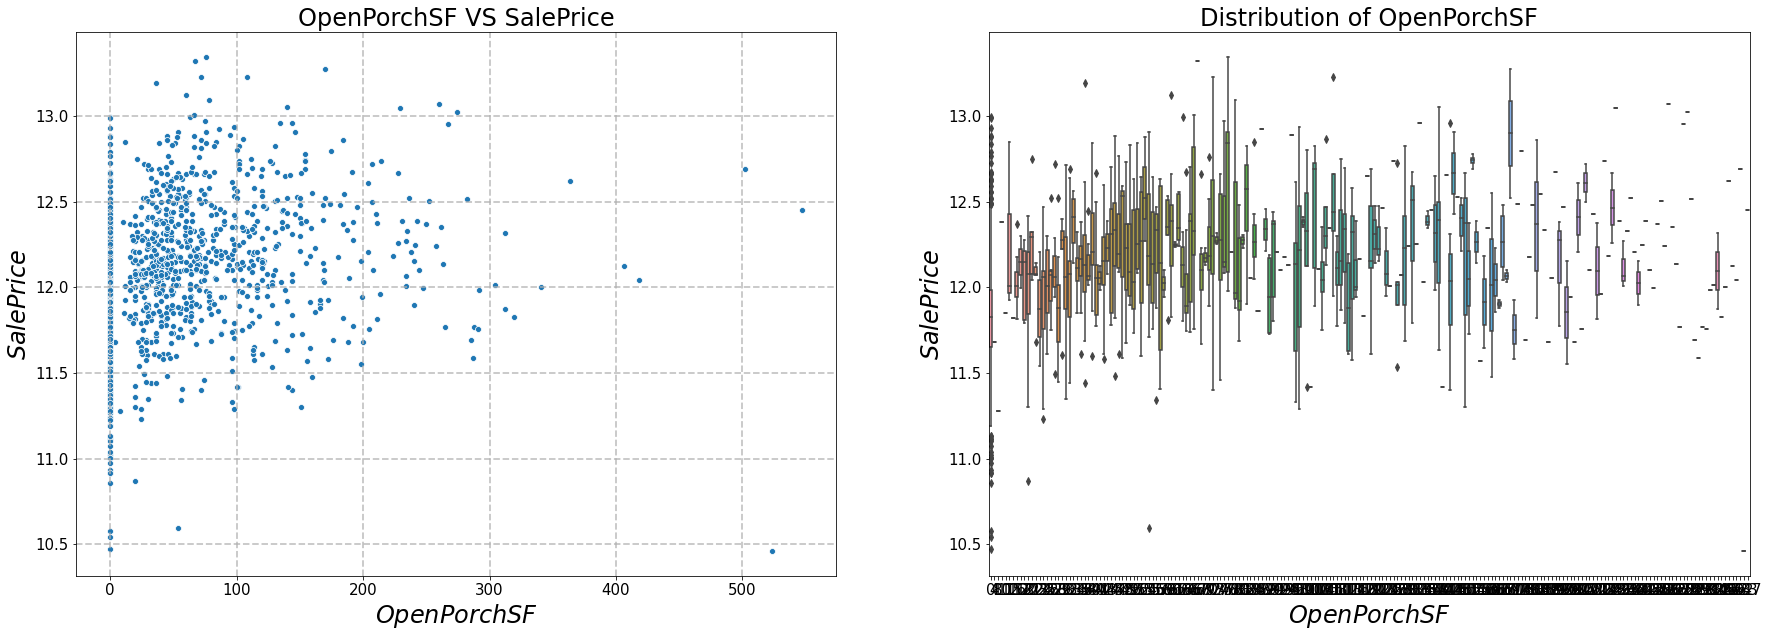

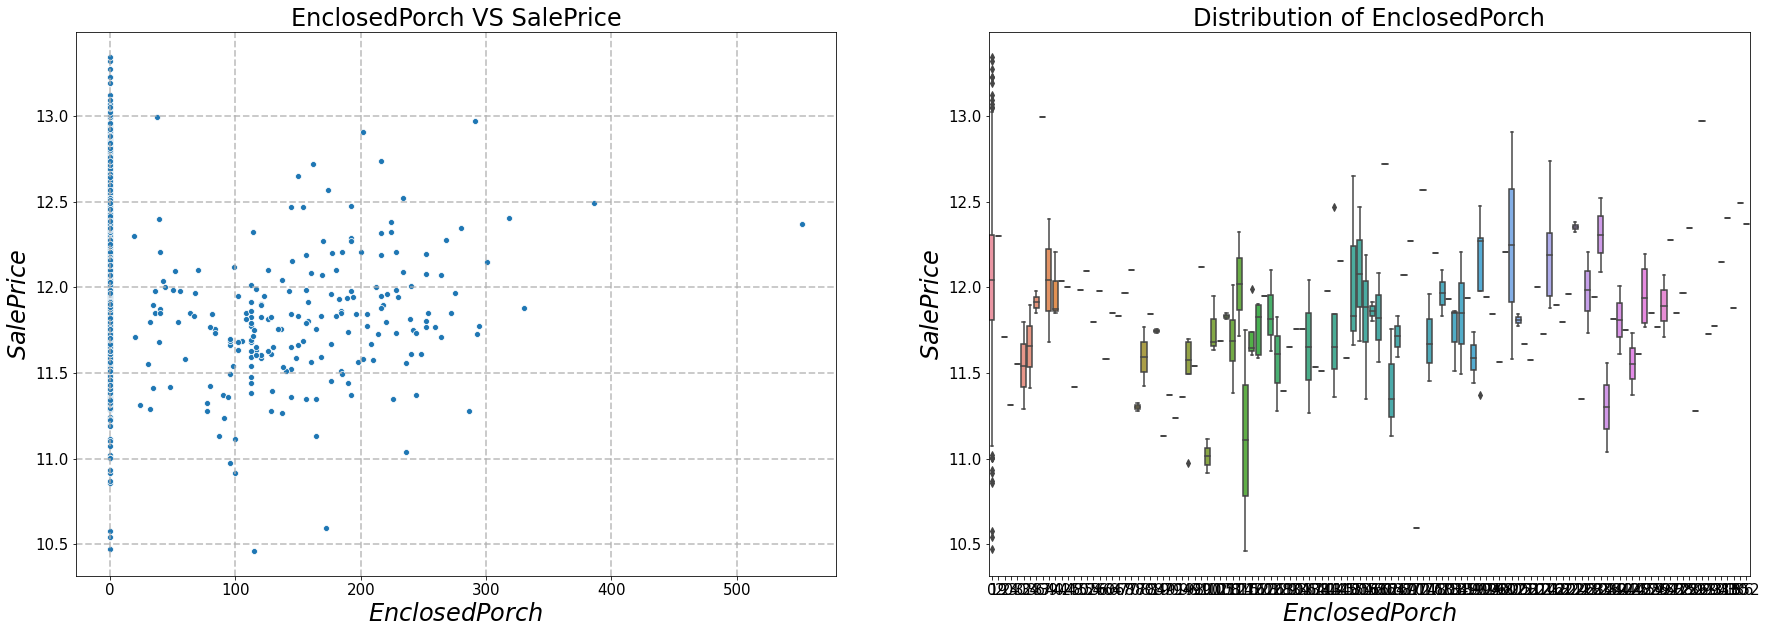

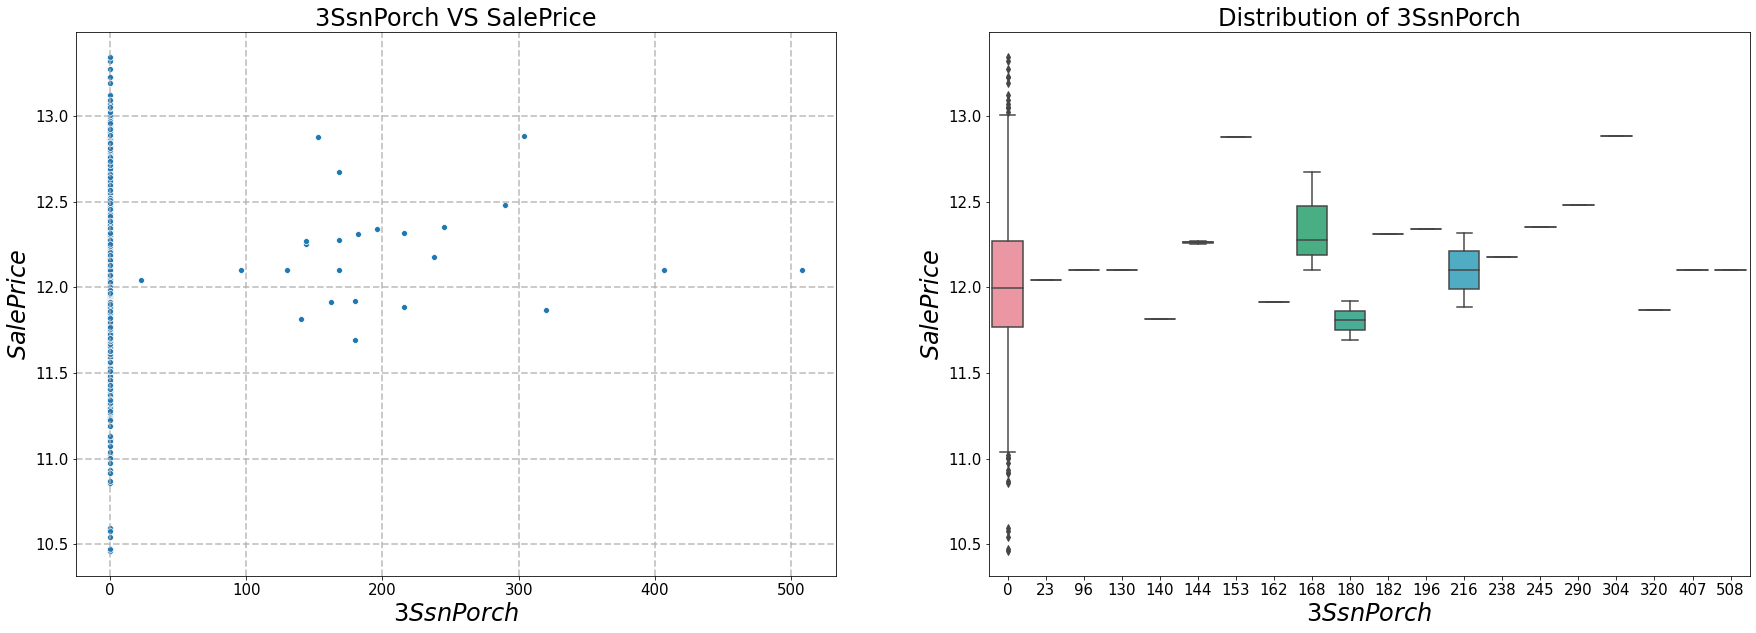

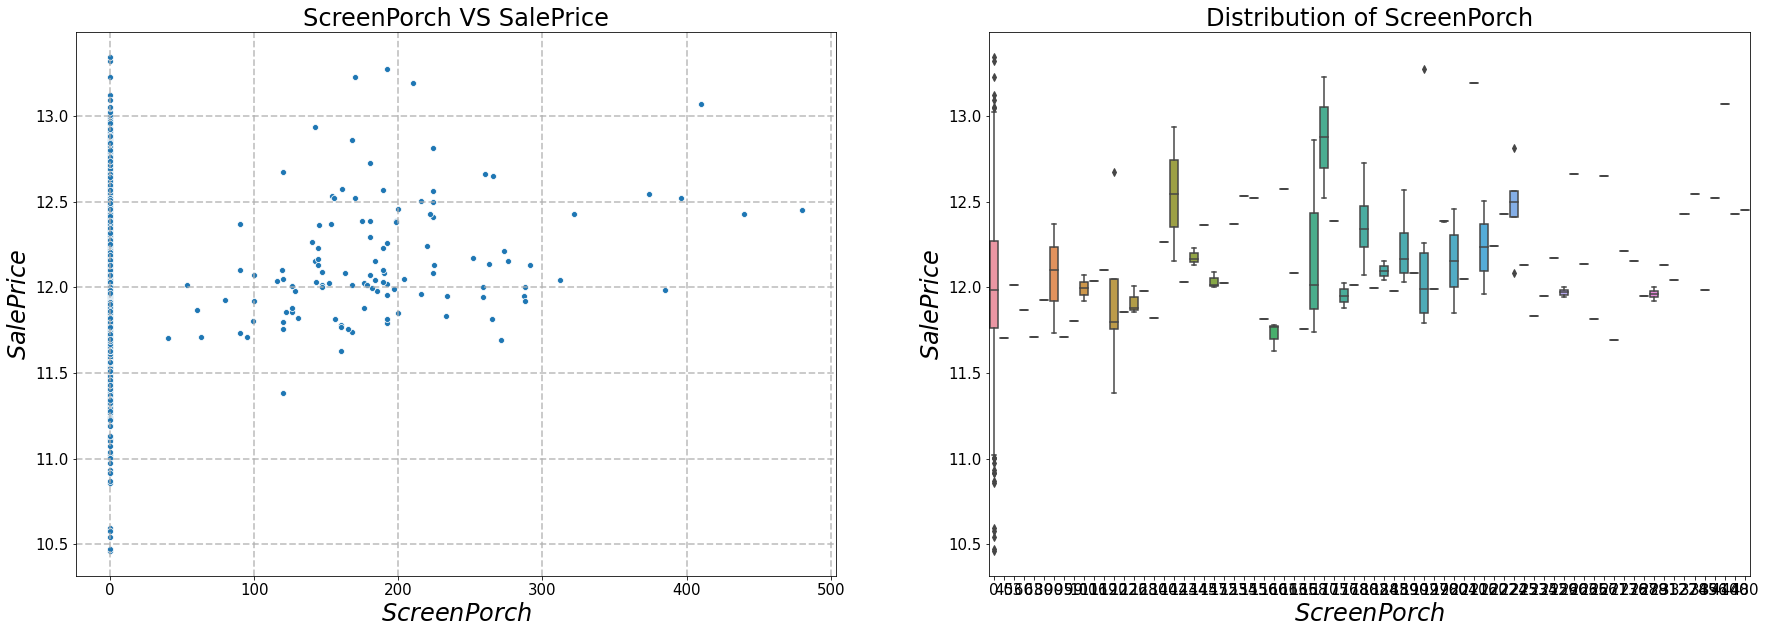

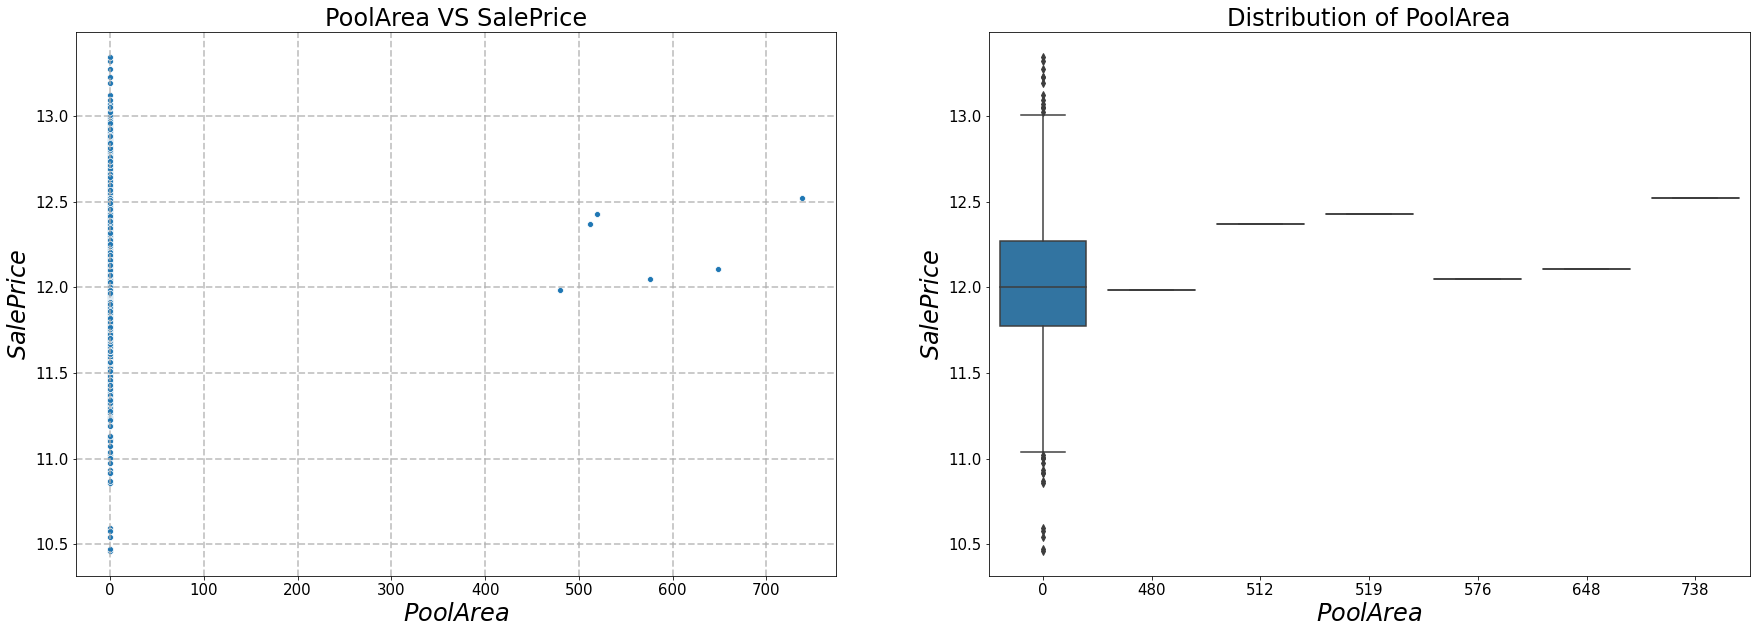

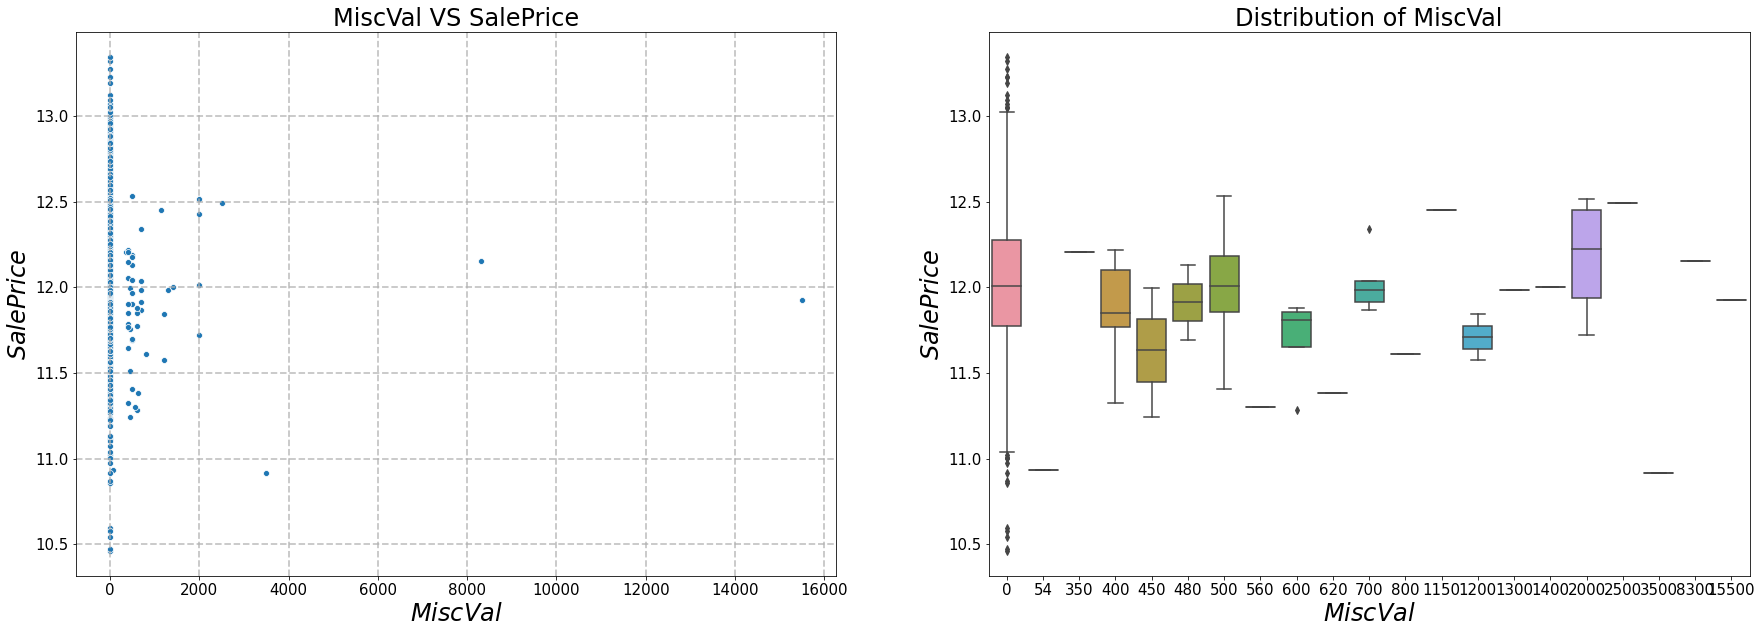

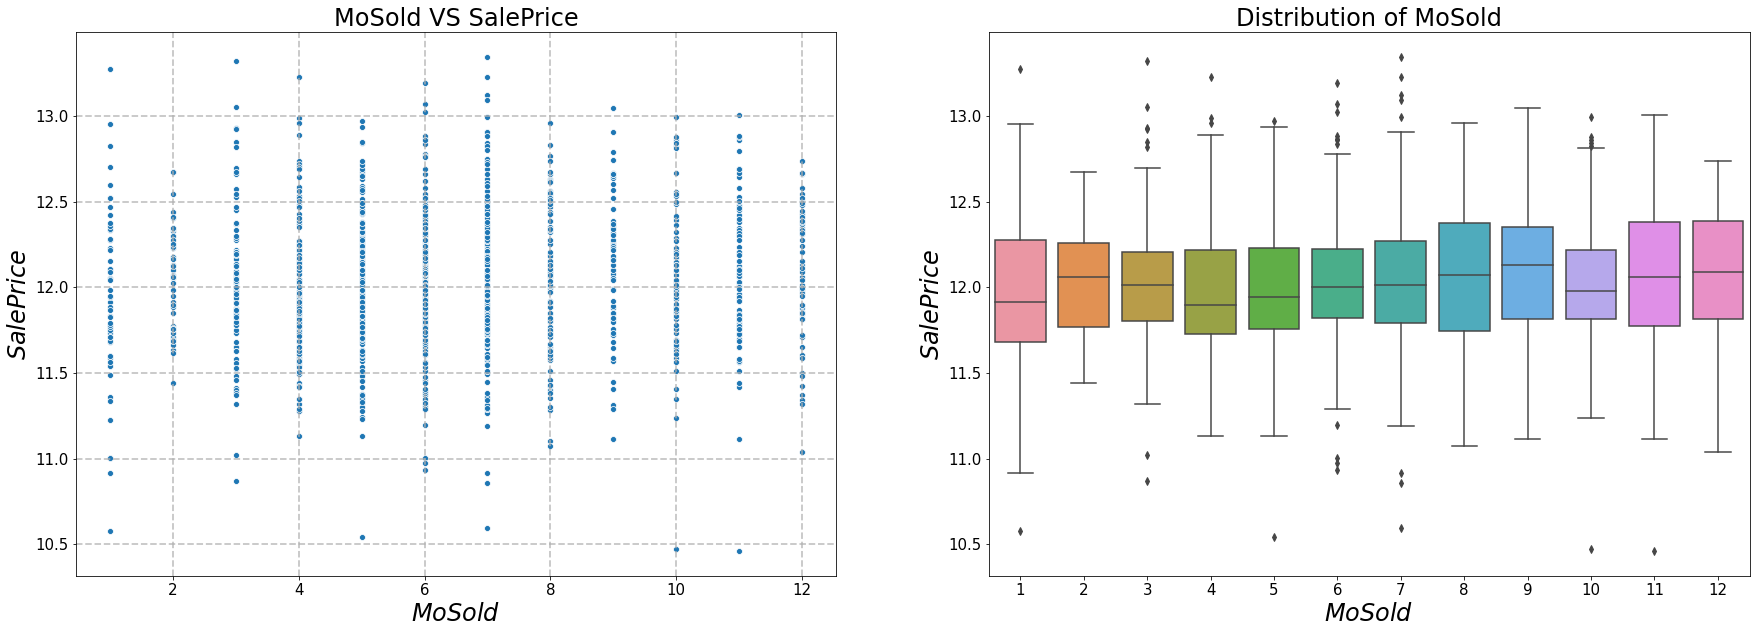

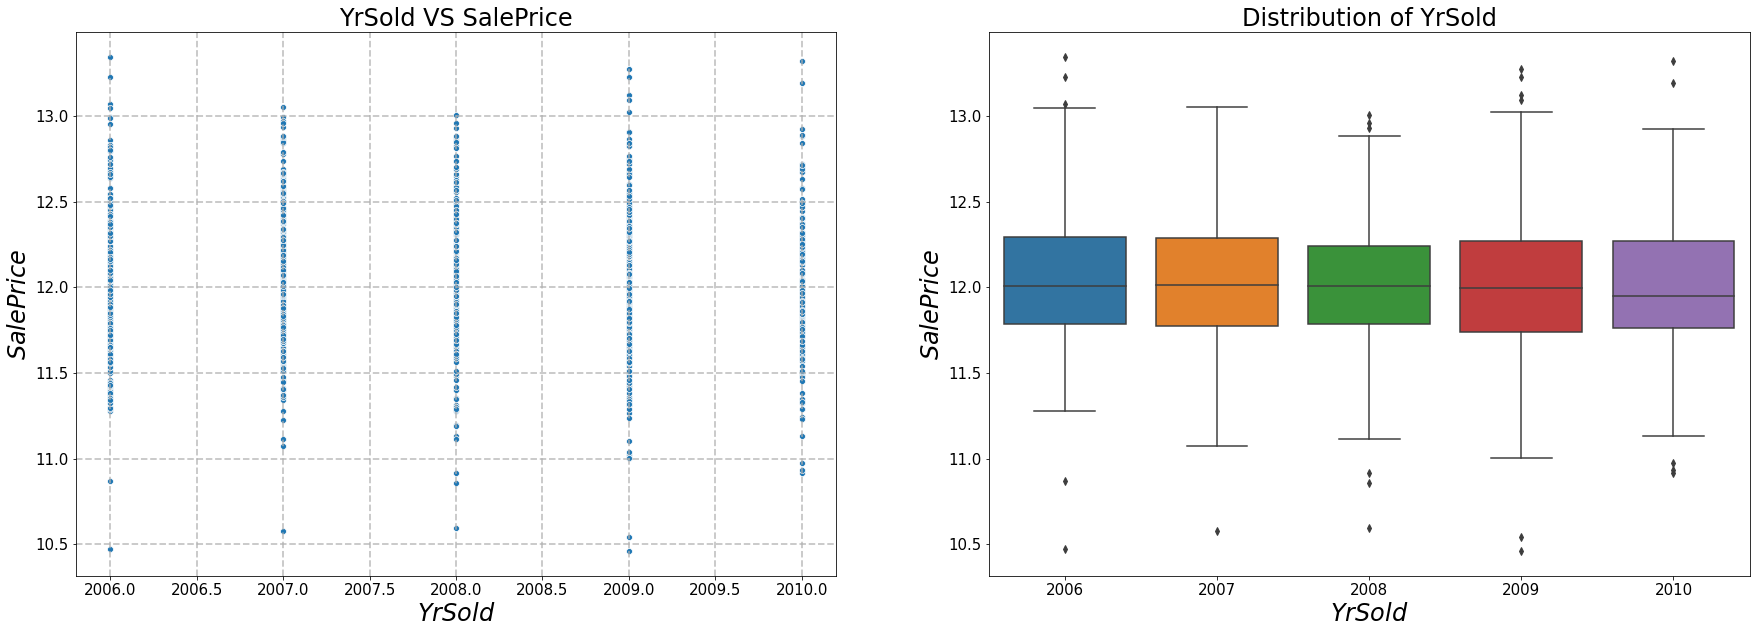

In [57]:
for cols in numerical_col:
  fig,ax=plt.subplots(1,2,figsize=(30,10))

  #scatterplot
  sns.scatterplot(x=train[cols],y=train['SalePrice'],ax=ax[0])
  ax[0].set_title('{} VS SalePrice'.format(cols),fontsize=24)
  ax[0].set_xlabel(r'${}$'.format(cols),fontsize=24)
  ax[0].set_ylabel(r'$SalePrice$',fontsize=24)
  
  ax[0].tick_params(labelsize=15)
  ax[0].grid(True, lw=1.75, ls='--',alpha=0.75)

  #boxplot
  sns.boxplot(x=train[cols],y=train['SalePrice'],ax=ax[1])
  ax[1].set_title('Distribution of {}'.format(cols),fontsize=24)
  ax[1].set_xlabel(r'${}$'.format(cols),fontsize=24)
  ax[1].set_ylabel(r'$SalePrice$',fontsize=24)
  ax[1].tick_params(labelsize=15)
  


Outliers are definitely present in most of the columns.But I considered these columns(
LotFrontage,MasVnrArea, BSmtFinSF1,BSmtFinSF2,1stFlrSF,TotalBsmtSF,GrLivArea,OverallQual , BedroomAbvGr, Enclosed Porch) and decided to remove outliers after considering all factors.

### Outliers Handling 

In [0]:
#handling outliers in numerical columns
train.drop(train[(train['LotFrontage']>300) & (train['BsmtFinSF1']>5000) & (train['1stFlrSF']>4000) & (train['GrLivArea']>5000)].index,inplace=True)
train.drop(train[train['MasVnrArea']>=1400].index,inplace=True)
train.drop(train[train['GrLivArea']>4000].index,inplace=True)

## **Categorical Features**

In [59]:
#categorical columns
categorical_col=train.select_dtypes(include='object').columns
categorical_col

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

### PLOT

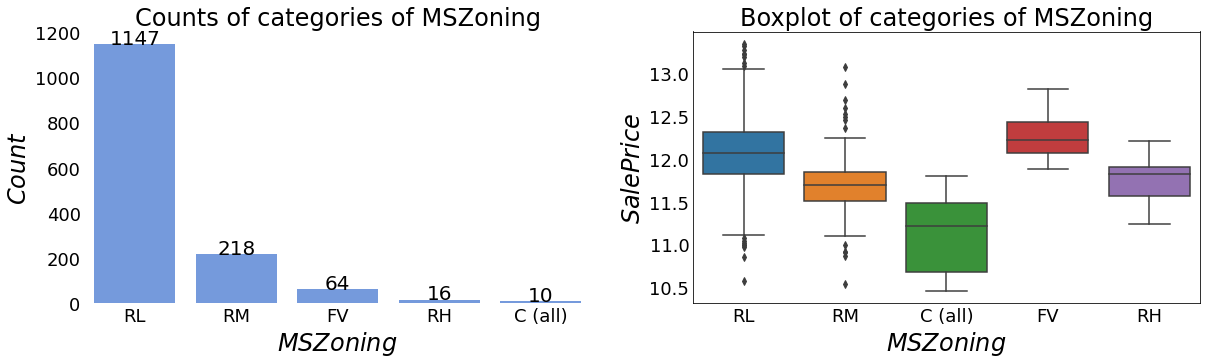

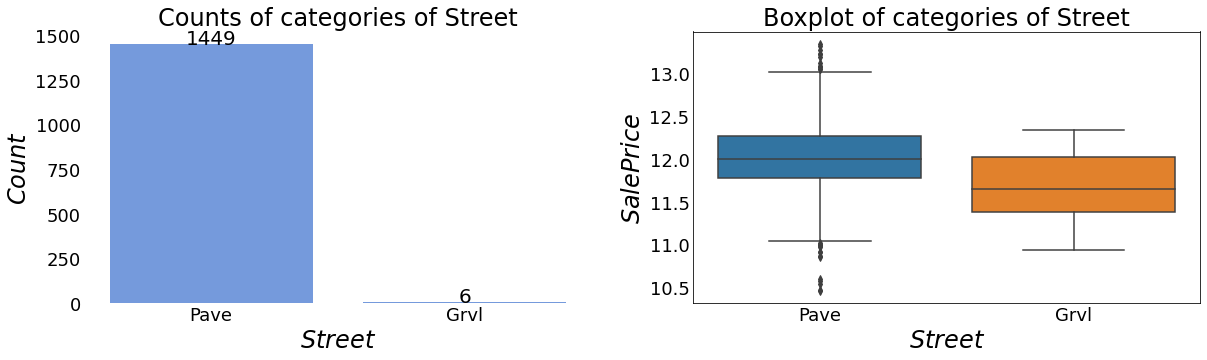

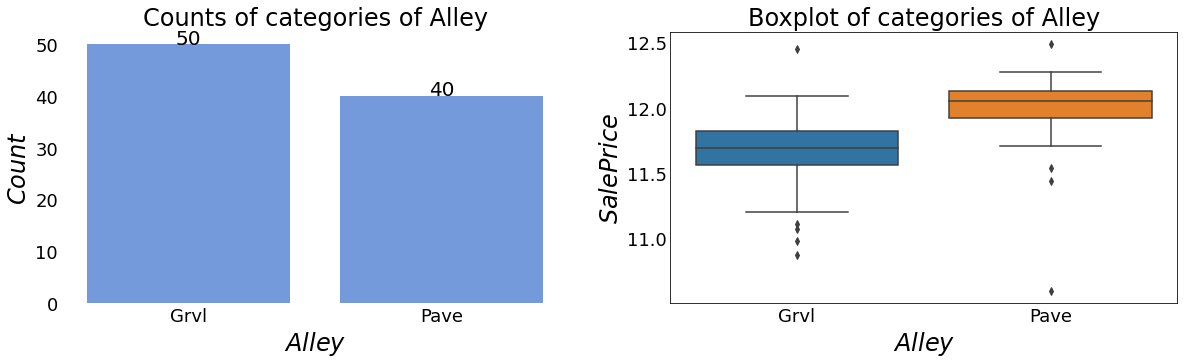

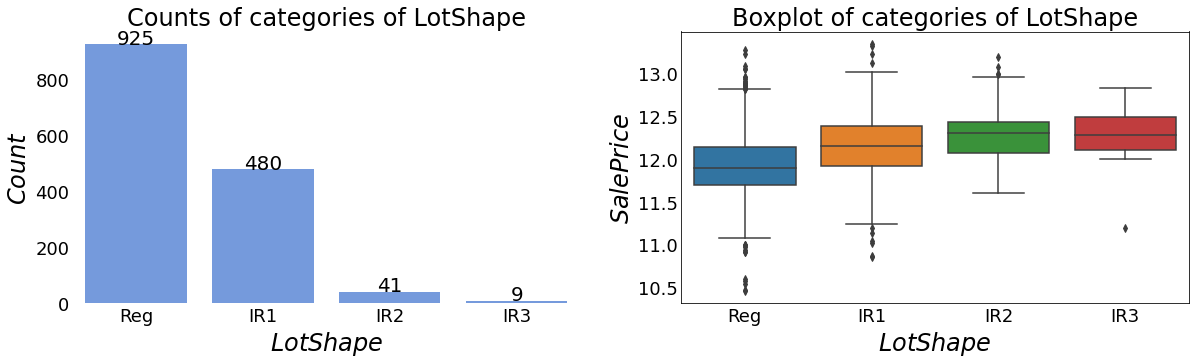

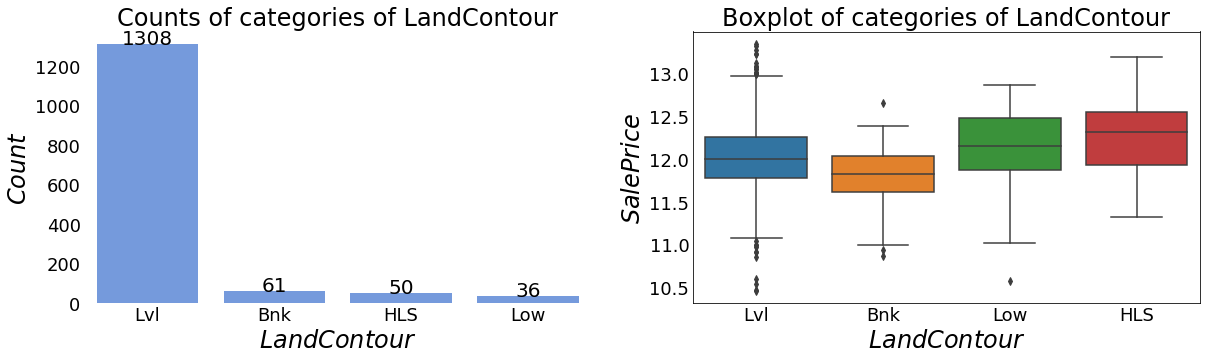

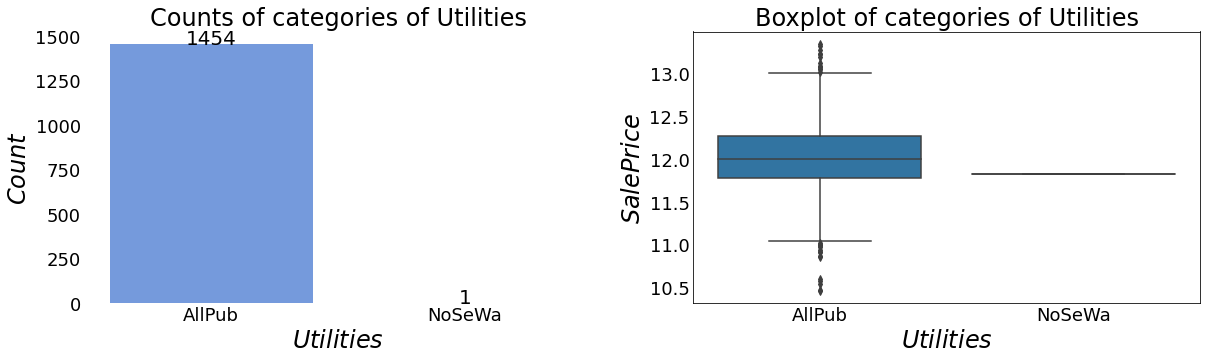

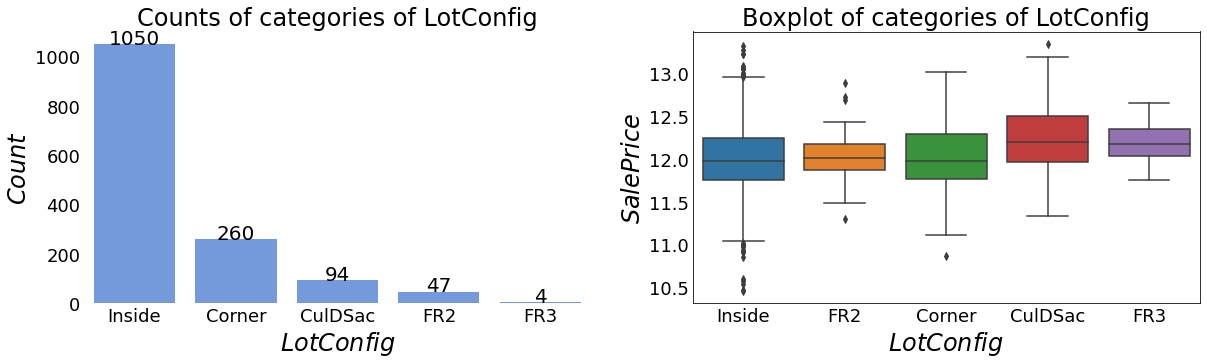

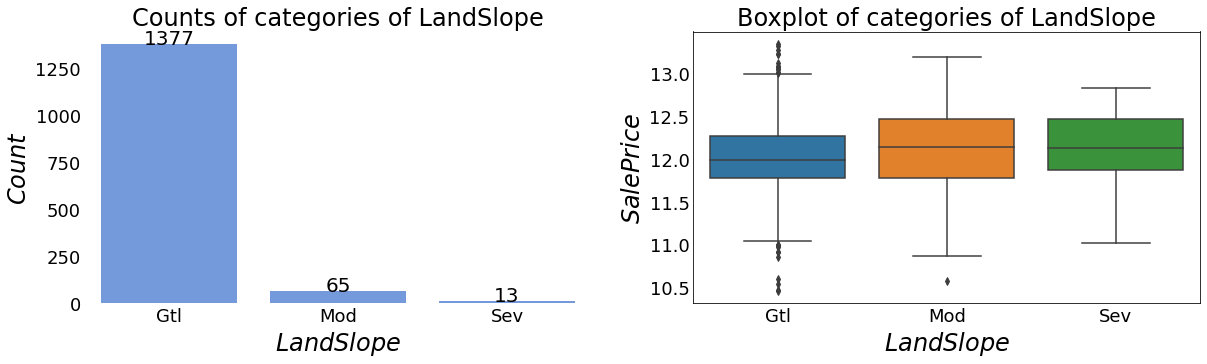

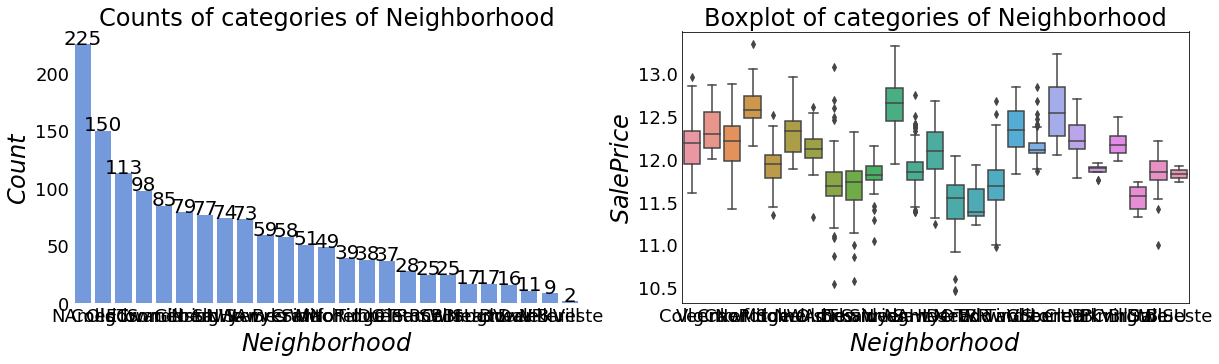

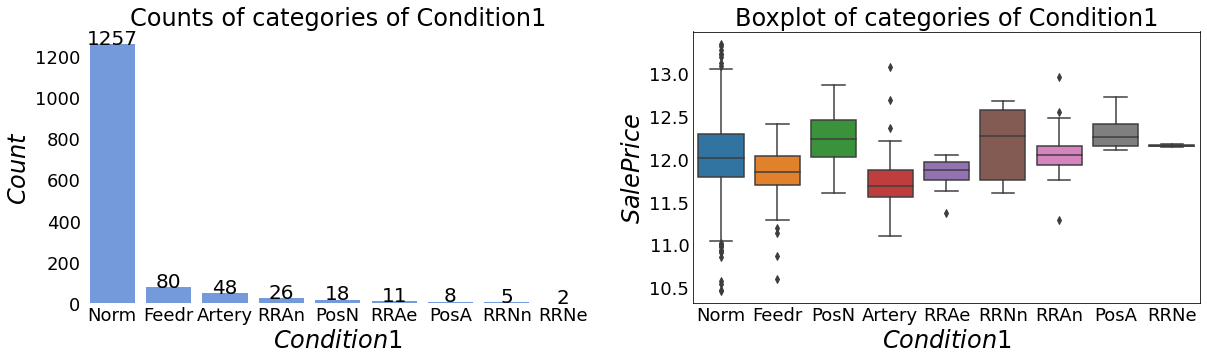

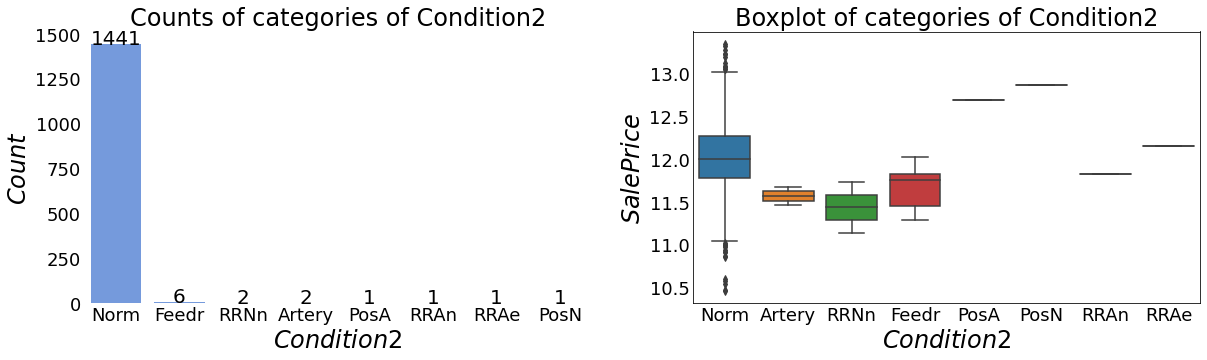

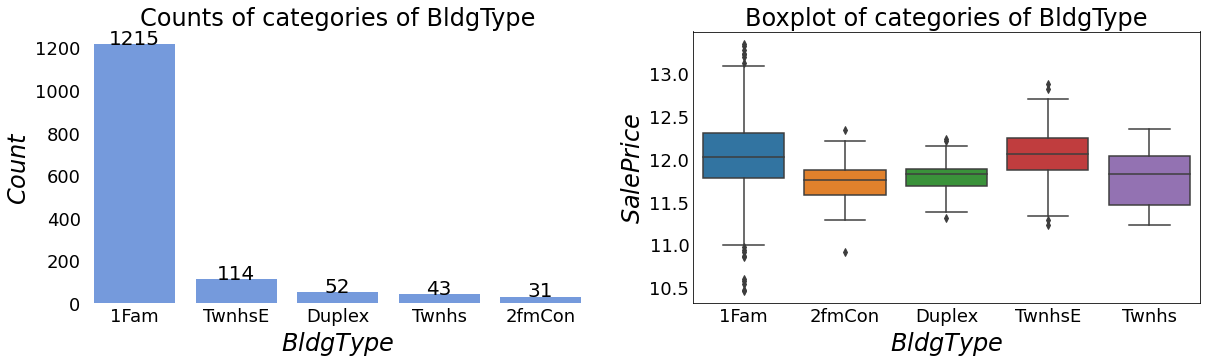

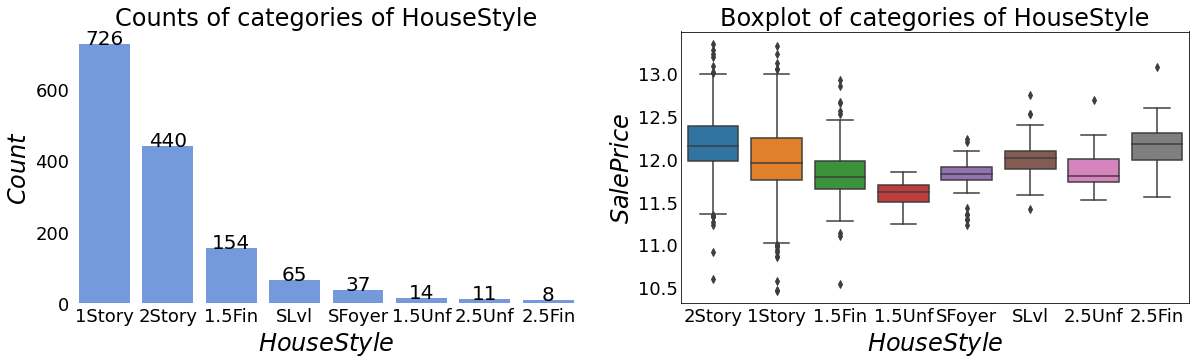

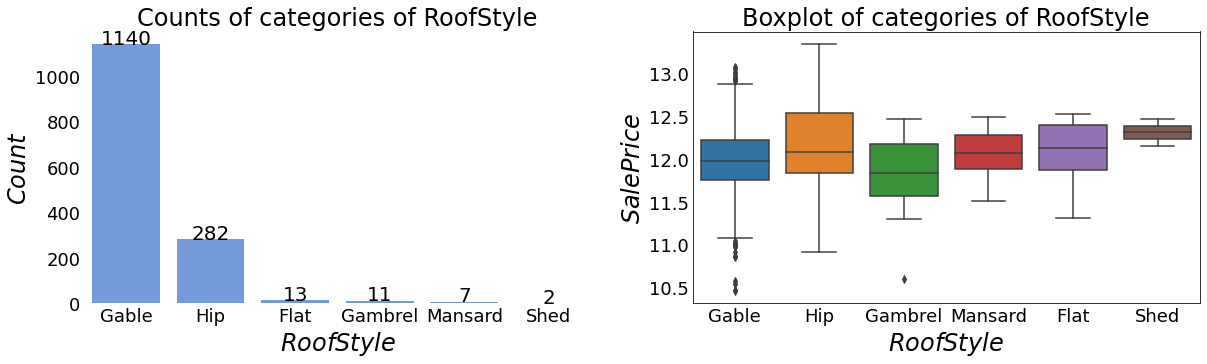

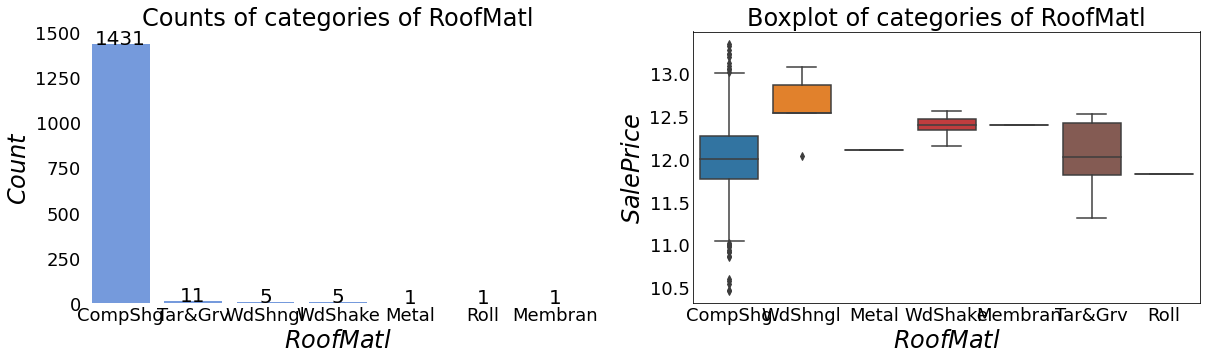

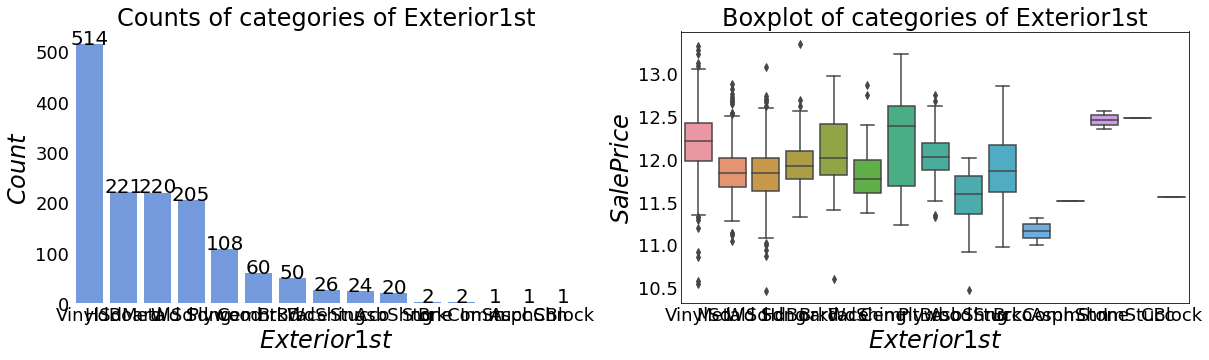

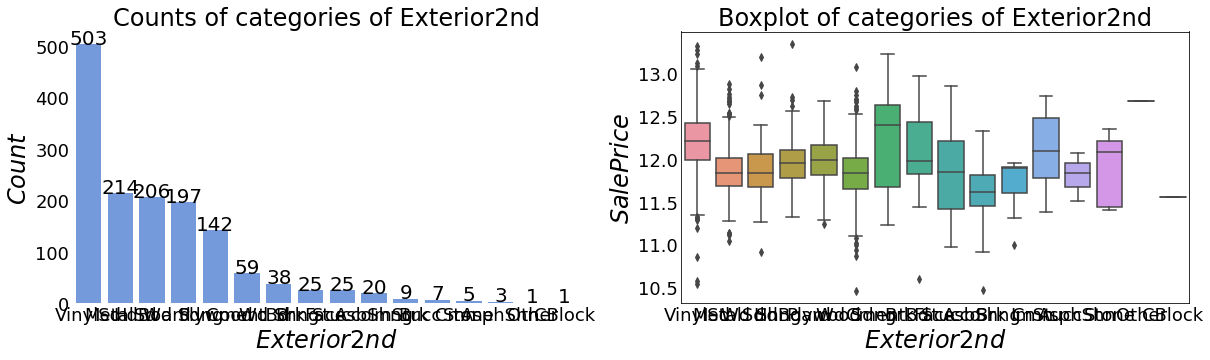

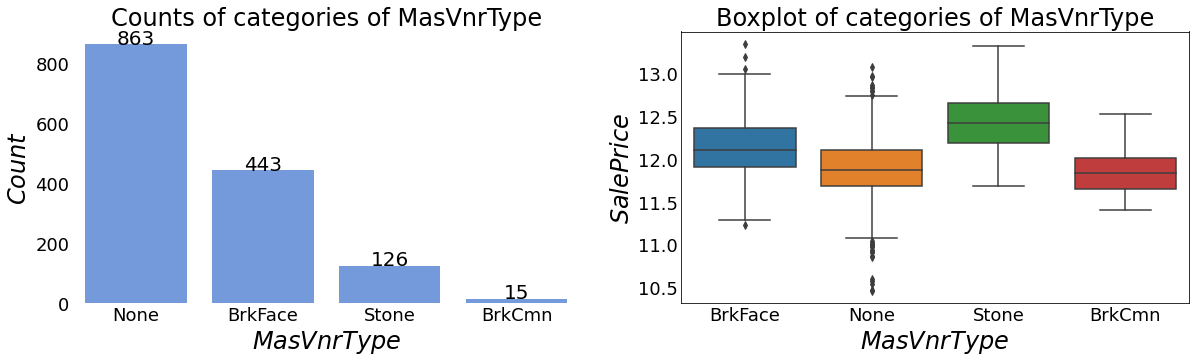

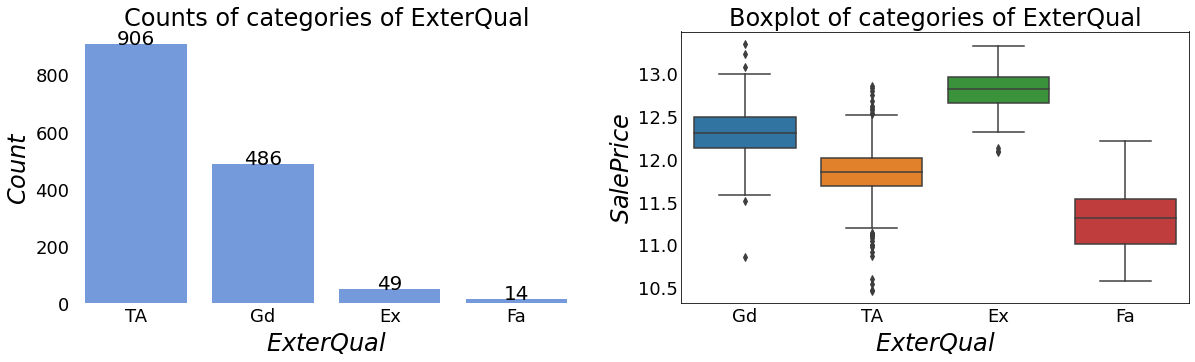

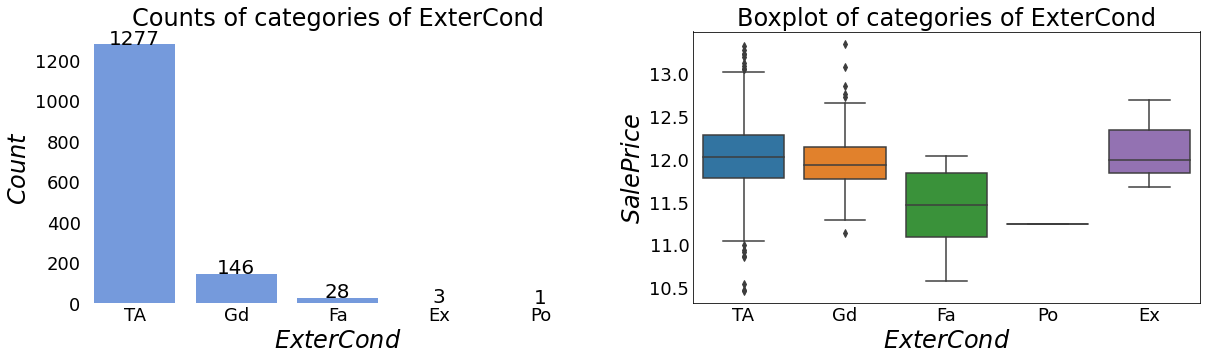

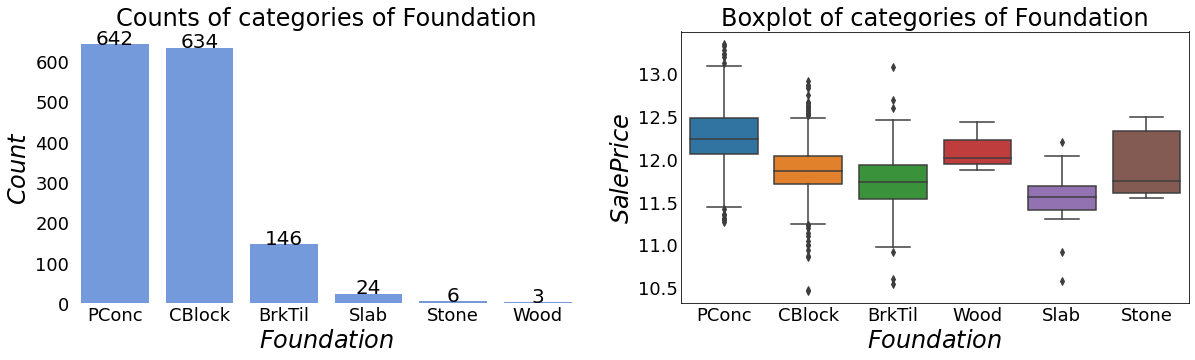

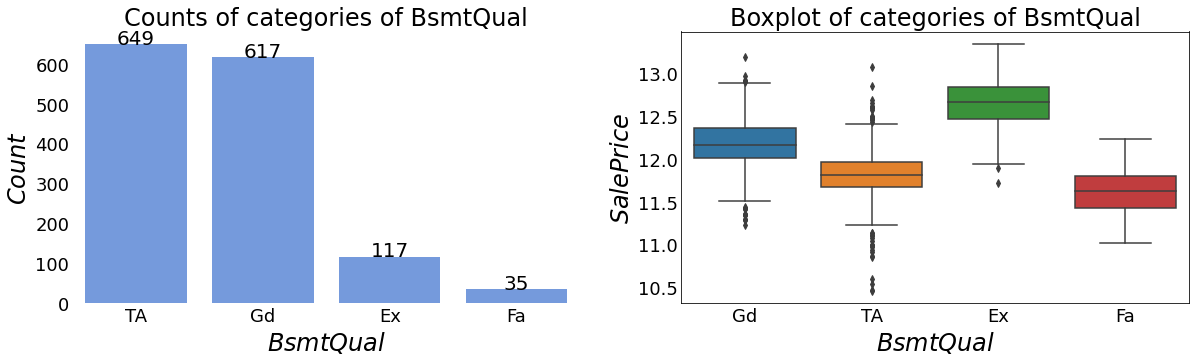

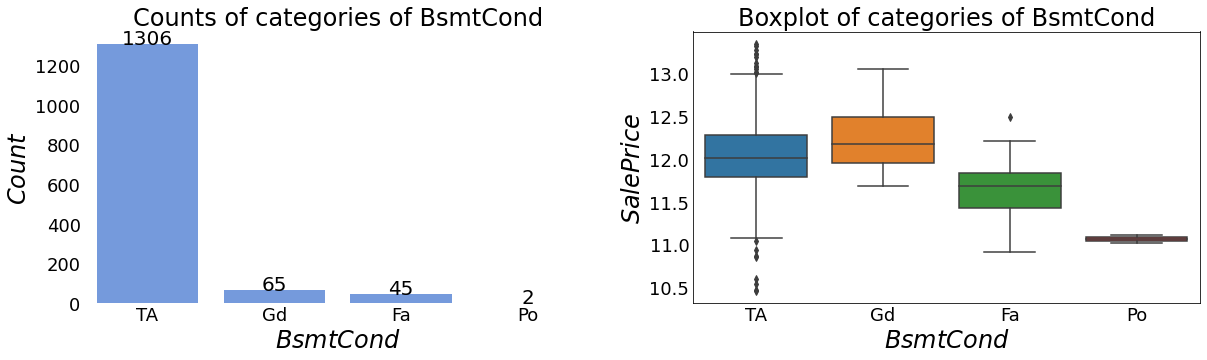

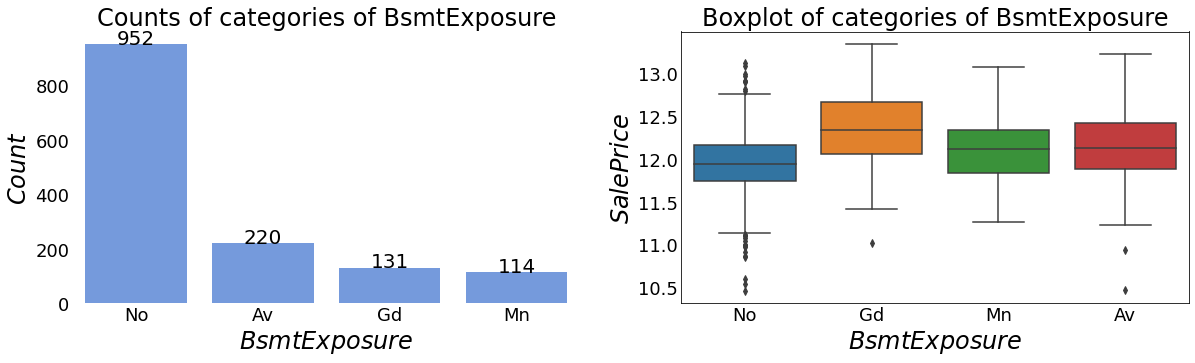

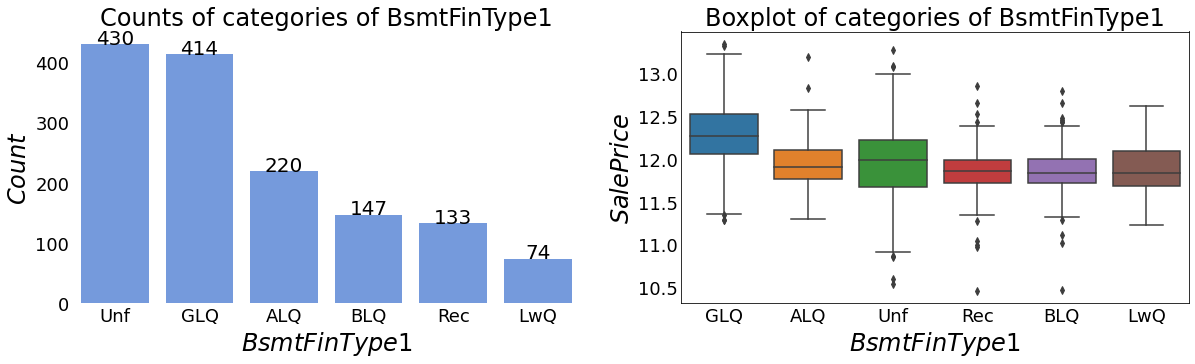

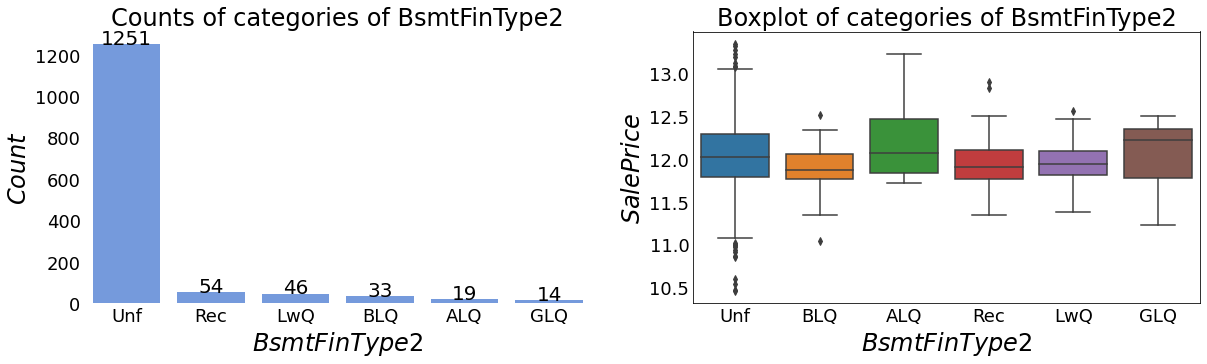

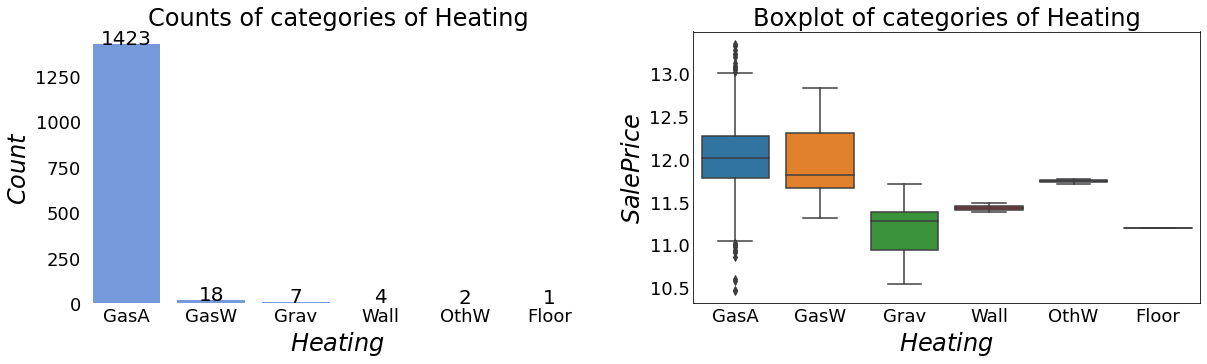

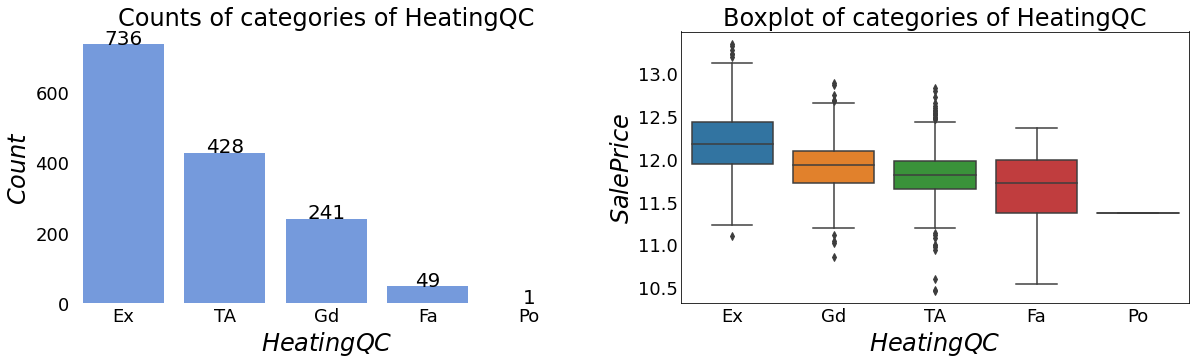

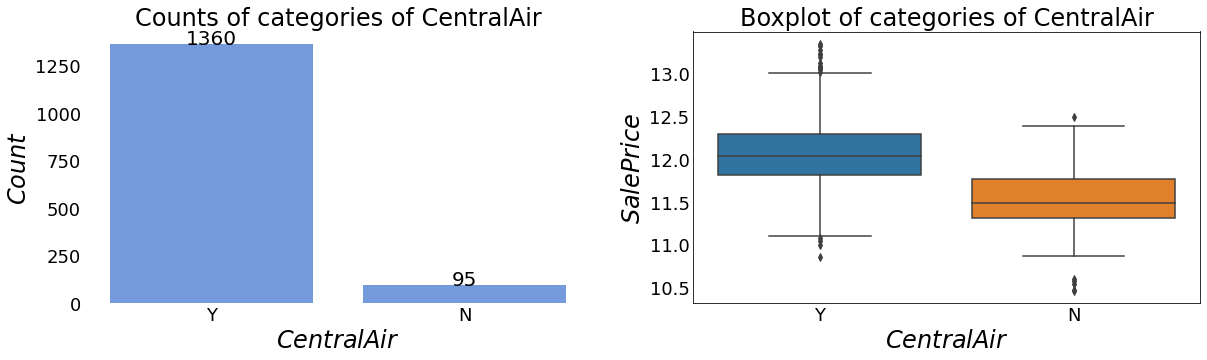

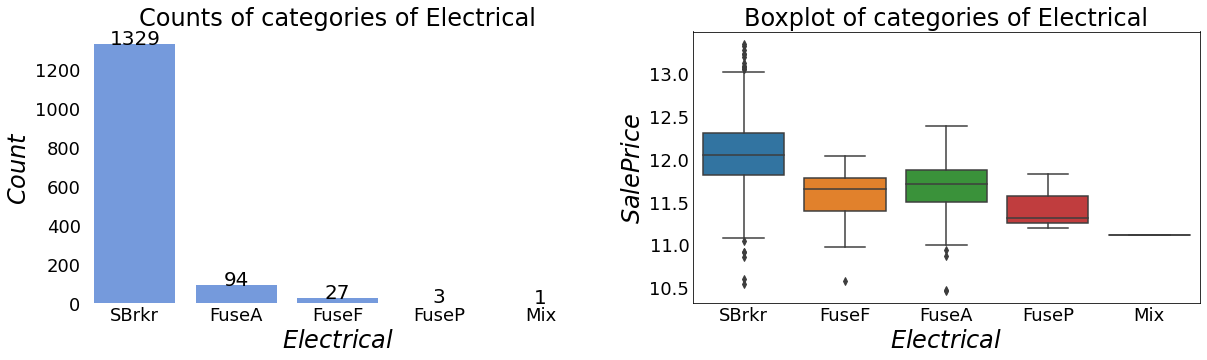

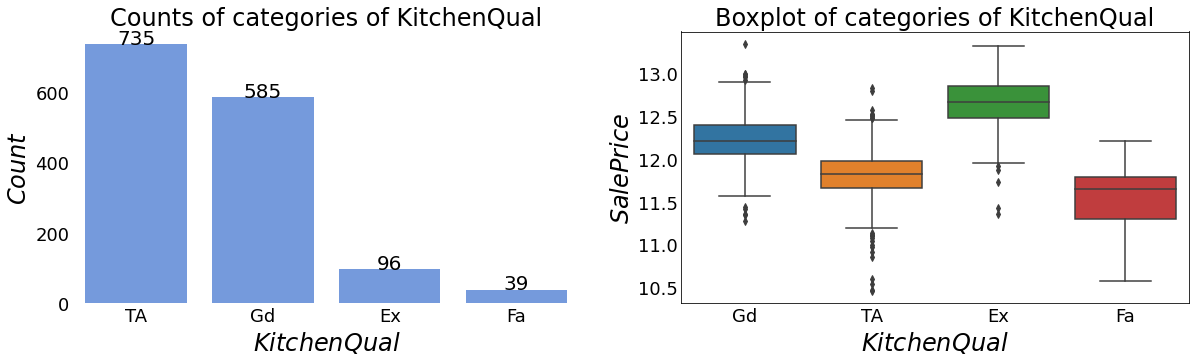

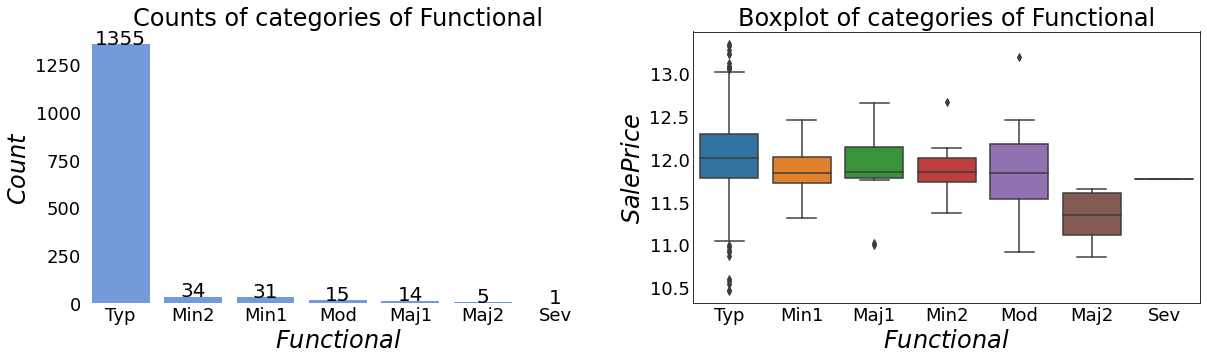

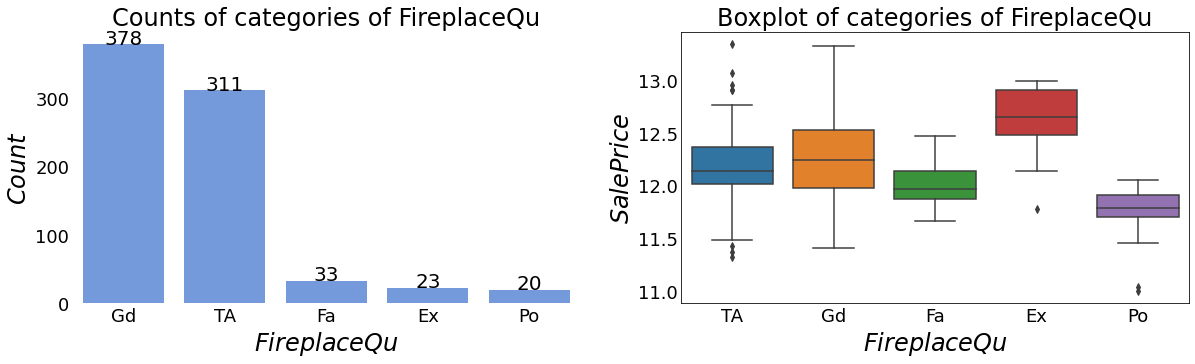

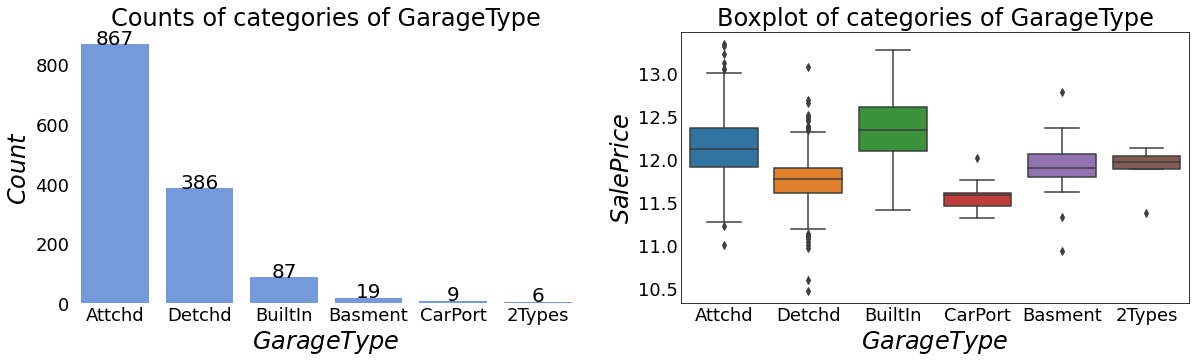

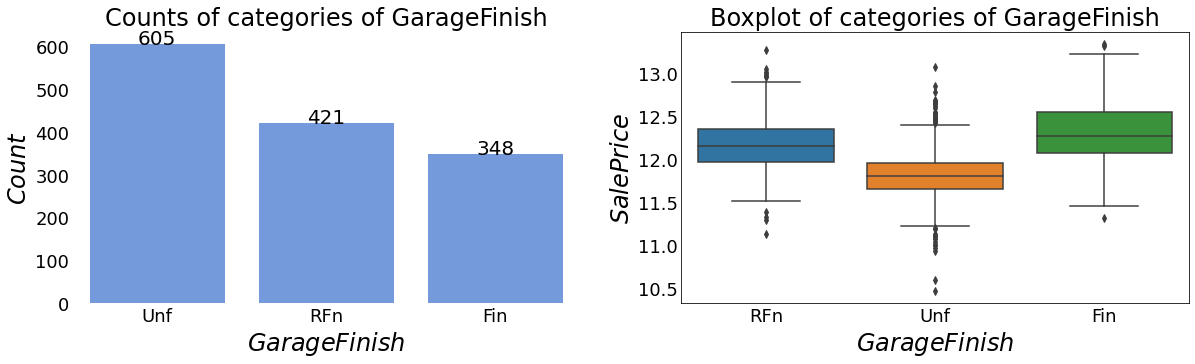

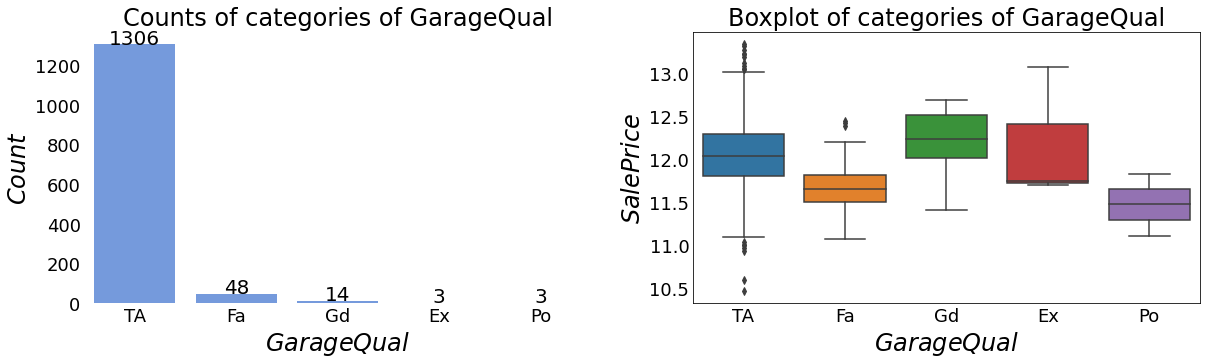

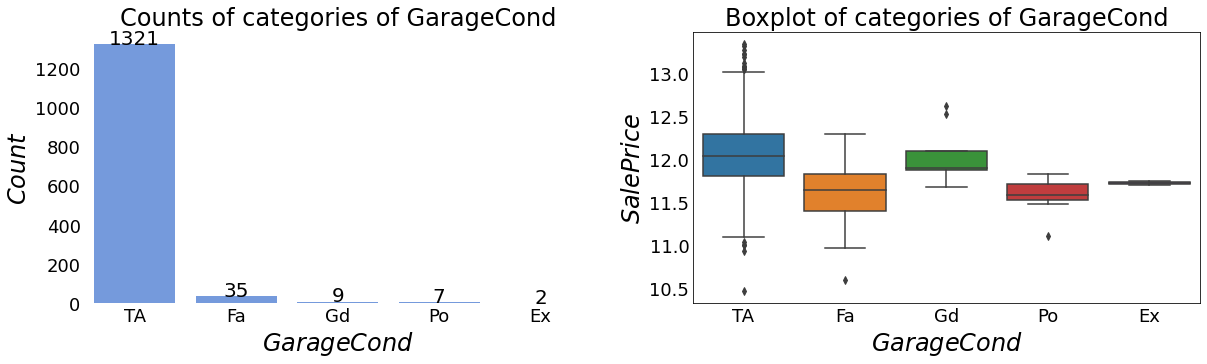

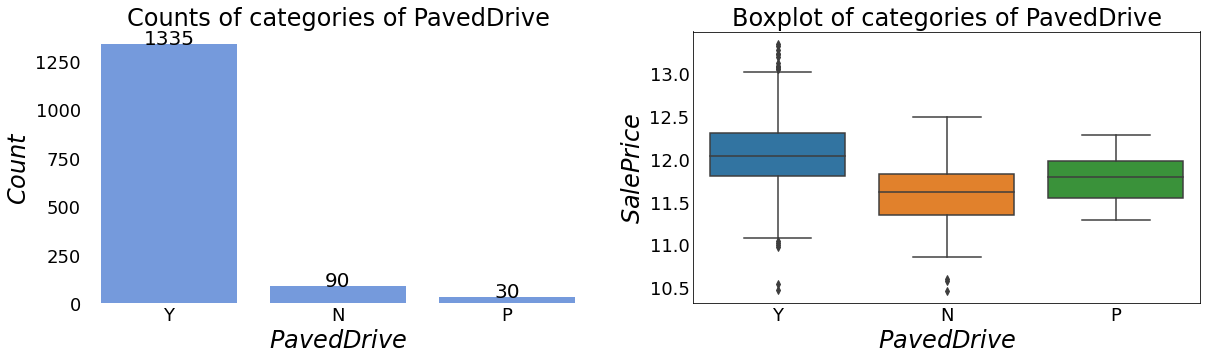

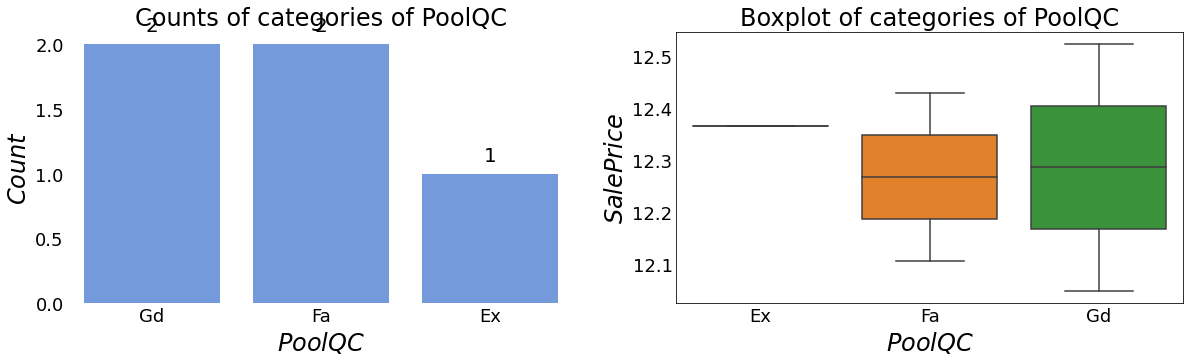

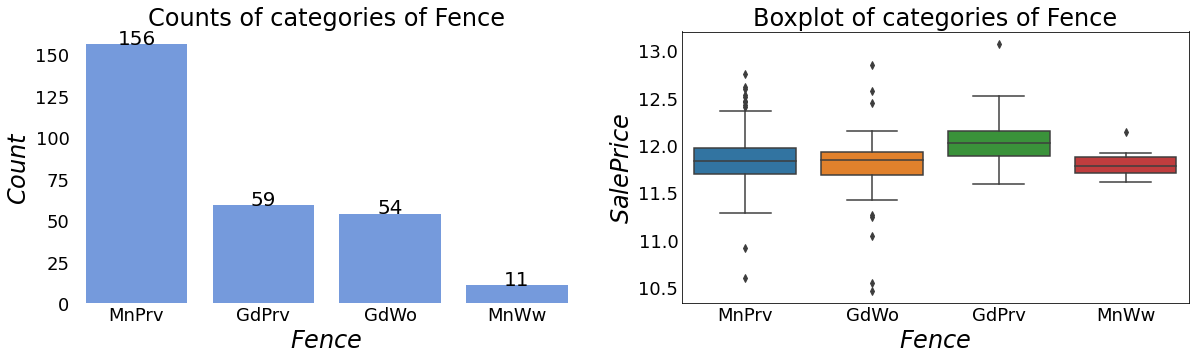

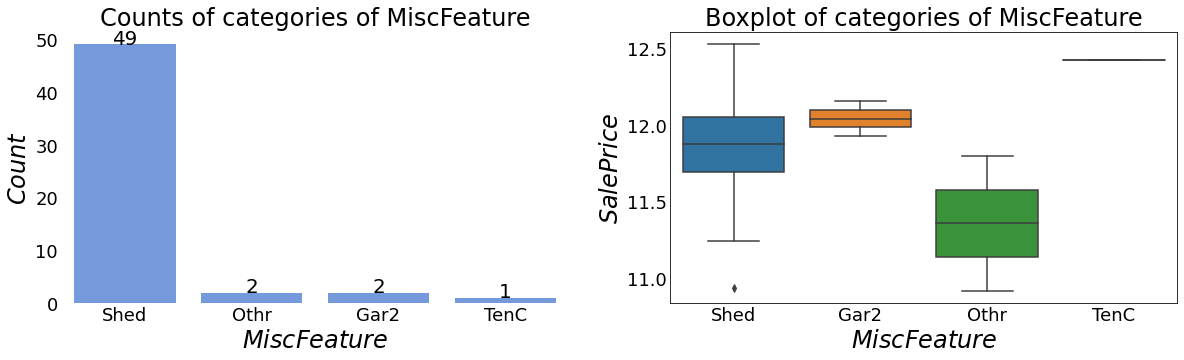

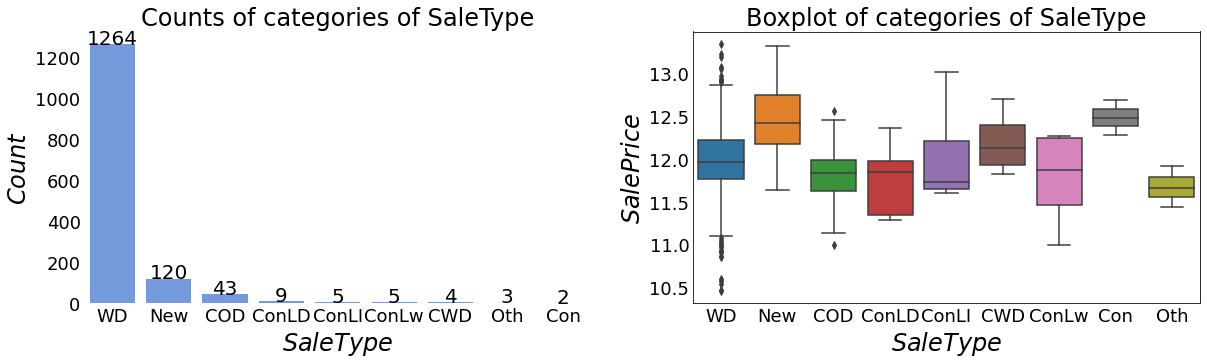

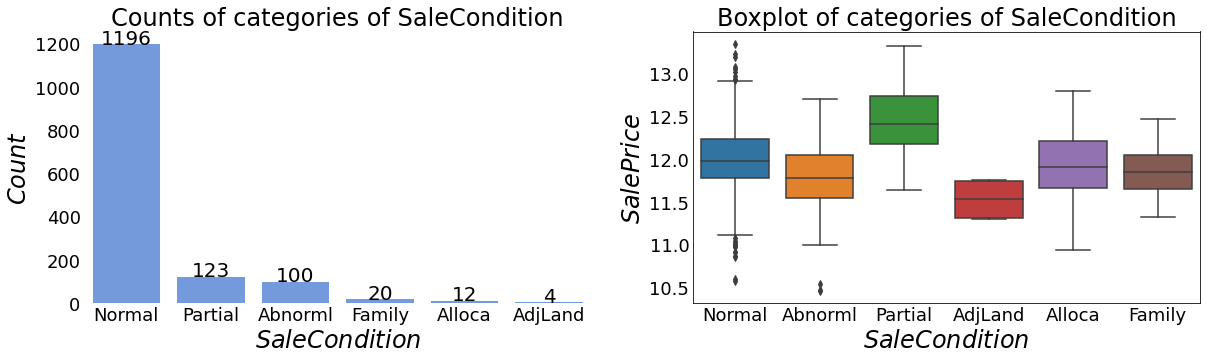

In [60]:
for cols in categorical_col:
  fig,ax=plt.subplots(1,2,figsize=(20,5))
  counts=train[cols].value_counts()
  sns.countplot(data = train, x =cols, order = counts.index,color='cornflowerblue',ax=ax[0])
  ax[0].set_title('Counts of categories of {}'.format(cols),fontsize=24)
  ax[0].set_xlabel(r'${}$'.format(cols),fontsize=24)
  ax[0].set_ylabel(r'$Count$',fontsize=24) 
  i=0
  for p in ax[0].patches:
    height = p.get_height()
    ax[0].text(p.get_x()+p.get_width()/2., height + 0.1,counts[i],ha="center",fontsize=20)
    i += 1
  ax[0].tick_params(axis='both', which='both',length=0,labelsize=18)  
  sns.despine(left=True, bottom=True,ax=ax[0])
  #ax[0].grid(axis = 'y', color ='white', linestyle='-')

  #boxplot
  sns.boxplot(x=cols,y='SalePrice', data=train,ax=ax[1])
  ax[1].set_title('Boxplot of categories of {}'.format(cols),fontsize=24)
  ax[1].set_xlabel(r'${}$'.format(cols),fontsize=24)
  ax[1].set_ylabel(r'$SalePrice$',fontsize=24) 
  ax[1].tick_params(axis='both', which='both',length=0,labelsize=18)
  

##**Correlation**

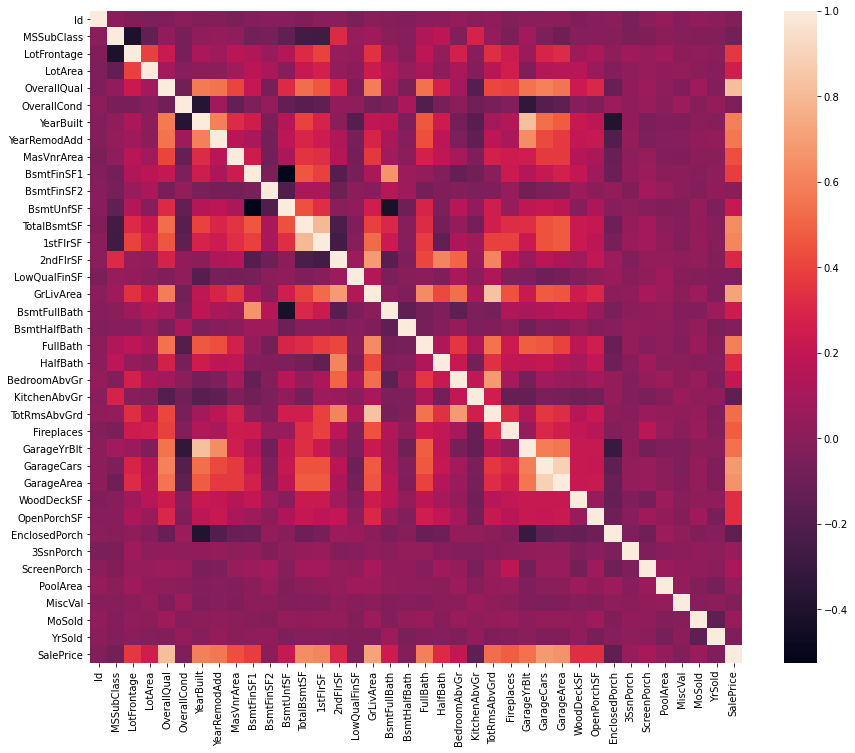

In [61]:
corr = train.corr()
plt.subplots(figsize=(15,12))
sns.heatmap(corr, square=True)

In [62]:
train.shape

(1455, 81)

##**Concatenating train and test to handle NULL values**

In [0]:
train_ID=train['Id']
train.drop(['Id'], axis=1, inplace=True)

test_ID=test['Id']
test.drop(['Id'], axis=1, inplace=True)

In [64]:
train_Y = train['SalePrice'].reset_index(drop=True)
train_x = train.drop(['SalePrice'], axis=1)
test_x = test

# Combine train_x and test_x in order to apply the feature transformation to the entire dataset
df_house = pd.concat([train_x, test_x]).reset_index(drop=True)
df_house.shape

(2914, 79)

Handling Null Values

In [65]:
null_chk=df_house.isnull().sum()/df_house.shape[0]*100
null_chk.sort_values(ascending=False)[:40]
#df_house.isnull().sum().sort_values(ascending=False)[:25]

PoolQC          99.725463
MiscFeature     96.396706
Alley           93.239533
Fence           80.439259
FireplaceQu     48.730268
LotFrontage     16.678106
GarageCond       5.456417
GarageQual       5.456417
GarageYrBlt      5.456417
GarageFinish     5.456417
GarageType       5.387783
BsmtCond         2.814001
BsmtExposure     2.814001
BsmtQual         2.779684
BsmtFinType2     2.745367
BsmtFinType1     2.711050
MasVnrType       0.823610
MasVnrArea       0.789293
MSZoning         0.137268
BsmtHalfBath     0.068634
Utilities        0.068634
Functional       0.068634
BsmtFullBath     0.068634
BsmtFinSF2       0.034317
BsmtFinSF1       0.034317
Exterior2nd      0.034317
BsmtUnfSF        0.034317
TotalBsmtSF      0.034317
Exterior1st      0.034317
SaleType         0.034317
Electrical       0.034317
KitchenQual      0.034317
GarageArea       0.034317
GarageCars       0.034317
OverallQual      0.000000
OverallCond      0.000000
LotArea          0.000000
Street           0.000000
LotShape    

In [0]:
#As per description 'PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageType','GarageQual','GarageCond','GarageFinish','BsmtExposure','BsmtFinType2','BsmtQual','BsmtFinType1' has NA value to represent 
df_house.update(df_house[['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageType','GarageQual','GarageCond','GarageFinish','BsmtExposure','BsmtFinType2','BsmtQual','BsmtCond','BsmtFinType1','MasVnrType']].fillna('None'))

#Electrial column has only one null value, so will assign mode to it
df_house['Electrical'].fillna(df_house['Electrical'].mode()[0],inplace=True)

#MasVnrArea column has similar 8 null values, so again will assign mode to it
df_house['MasVnrArea'].fillna(df_house['MasVnrArea'].mode()[0],inplace=True)

#GarageYrBlt---> after looking into data, I found out that those NA values are because Garage was never built so will assign 0
df_house['GarageYrBlt'].fillna(0,inplace=True)

#Lot Frontage: I have used Neighborhood to find out LOTFrontage
df_house['LotFrontage']=df_house.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))



In [0]:
df_house['MSZoning'] = df_house.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))
df_house['Functional'].fillna(df_house['Functional'].mode()[0],inplace=True)
df_house['BsmtFullBath'].fillna(df_house['BsmtFullBath'].mode()[0],inplace=True)
df_house['Utilities'].fillna(df_house['Utilities'].mode()[0],inplace=True)
df_house['BsmtHalfBath'].fillna(df_house['BsmtHalfBath'].mode()[0],inplace=True)
df_house['KitchenQual'].fillna(df_house['KitchenQual'].mode()[0],inplace=True)
df_house['BsmtFinSF1'].fillna(0,inplace=True)
df_house['KitchenQual'].fillna(df_house['KitchenQual'].mode()[0],inplace=True)
df_house['Exterior1st'].fillna('Other',inplace=True)
df_house['Exterior2nd'].fillna('Other',inplace=True)
df_house['GarageCars'].fillna(0,inplace=True)
df_house['GarageArea'].fillna(0,inplace=True)
df_house['BsmtFinSF2'].fillna(0,inplace=True)
df_house['SaleType'].fillna('Other',inplace=True)
df_house['TotalBsmtSF'].fillna(0,inplace=True)
df_house['BsmtUnfSF'].fillna(0,inplace=True)


Fixing Skewed columns

In [68]:
#skew of numerical columns
skew_cols = df_house[numerical_col].apply(lambda x: x.skew()).sort_values(ascending=False)
skew_cols

MiscVal          21.939679
PoolArea         18.708225
LotArea          13.128749
LowQualFinSF     12.084424
3SsnPorch        11.371955
KitchenAbvGr      4.300206
BsmtFinSF2        4.144176
EnclosedPorch     4.002083
ScreenPorch       3.957871
BsmtHalfBath      3.944121
OpenPorchSF       2.530003
MasVnrArea        2.492874
WoodDeckSF        1.848817
MSSubClass        1.375349
1stFlrSF          1.253135
LotFrontage       1.092375
GrLivArea         0.979307
BsmtFinSF1        0.975041
BsmtUnfSF         0.920089
2ndFlrSF          0.844890
TotRmsAbvGrd      0.750235
Fireplaces        0.726917
HalfBath          0.700185
TotalBsmtSF       0.662720
BsmtFullBath      0.622594
OverallCond       0.568936
BedroomAbvGr      0.328421
GarageArea        0.218309
MoSold            0.198398
OverallQual       0.182581
FullBath          0.160666
YrSold            0.130433
GarageCars       -0.219180
YearRemodAdd     -0.448788
YearBuilt        -0.597850
GarageYrBlt      -3.904264
dtype: float64

There are no high negative skews. A value less than -1 and more than 1 is considered to be highly skewed.

In [69]:
high_skew_cols = skew_cols[skew_cols >1]
high_skew_cols

MiscVal          21.939679
PoolArea         18.708225
LotArea          13.128749
LowQualFinSF     12.084424
3SsnPorch        11.371955
KitchenAbvGr      4.300206
BsmtFinSF2        4.144176
EnclosedPorch     4.002083
ScreenPorch       3.957871
BsmtHalfBath      3.944121
OpenPorchSF       2.530003
MasVnrArea        2.492874
WoodDeckSF        1.848817
MSSubClass        1.375349
1stFlrSF          1.253135
LotFrontage       1.092375
dtype: float64

In [0]:
#Normalize the data
for ind in high_skew_cols.index:
    df_house[ind] = boxcox1p(df_house[ind], boxcox_normmax(df_house[ind] + 1))

In [71]:
skew_cols = df_house[numerical_col].apply(lambda x: x.skew()).sort_values(ascending=False)
skew_cols

PoolArea         16.295615
3SsnPorch         8.861956
LowQualFinSF      8.492504
MiscVal           5.237810
BsmtHalfBath      3.792064
KitchenAbvGr      3.777940
ScreenPorch       3.159751
BsmtFinSF2        2.577947
EnclosedPorch     2.148701
GrLivArea         0.979307
MasVnrArea        0.976524
BsmtFinSF1        0.975041
BsmtUnfSF         0.920089
2ndFlrSF          0.844890
WoodDeckSF        0.786416
TotRmsAbvGrd      0.750235
Fireplaces        0.726917
HalfBath          0.700185
TotalBsmtSF       0.662720
BsmtFullBath      0.622594
OpenPorchSF       0.622437
OverallCond       0.568936
MSSubClass        0.438686
BedroomAbvGr      0.328421
GarageArea        0.218309
MoSold            0.198398
OverallQual       0.182581
FullBath          0.160666
YrSold            0.130433
LotFrontage       0.058548
1stFlrSF         -0.008560
LotArea          -0.139314
GarageCars       -0.219180
YearRemodAdd     -0.448788
YearBuilt        -0.597850
GarageYrBlt      -3.904264
dtype: float64

#Feautures Extraction

In [0]:
df_house['TotalFloorArea']=df_house['TotalBsmtSF']+df_house['GrLivArea']
df_house['HouseQuality']=df_house['OverallQual']+df_house['OverallCond']
df_house['TotalBathrooms']=df_house['BsmtFullBath']+(df_house['BsmtHalfBath']*0.5)+df_house['FullBath']+(df_house['HalfBath']*0.5)
df_house['TotalPorchArea'] =df_house['OpenPorchSF'] + df_house['3SsnPorch'] +df_house['EnclosedPorch'] + df_house['ScreenPorch'] +df_house['WoodDeckSF']

In [73]:
df_house.head()

MSSubClass MSZoning  LotFrontage    LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    6.495511       RL    18.421413  13.818365   Pave  None      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   19.866685        Gd        TA      PConc       Gd       TA           No          GLQ       706.0          Unf         0.0      150.0        856.0    GasA        Ex          Y      SBrkr  6.030427       854           0.0   
1    4.247741       RL    21.008235  14.102690   Pave  None      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd       None    0.000000        TA        TA     CBlock       Gd       TA           Gd          ALQ       978.0          Unf         0.0      284.0       1262.0    GasA        Ex          Y      SBrkr  6.336241         0           0.0   
2    6.495511       RL    18.956613  14.460597   Pave  None      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   18.147798        Gd        TA      PConc       Gd       TA           Mn          GLQ       486.0          Unf         0.0      434.0        920.0    GasA        Ex          Y      SBrkr  6.087528       866           0.0   
3    6.857964       RL    17.506740  14.090991   Pave  None      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng       None    0.000000        TA        TA     BrkTil       TA       Gd           No          ALQ       216.0          Unf         0.0      540.0        756.0    GasA        Gd          Y      SBrkr  6.121992       756           0.0   
4    6.495511       RL    21.663955  15.005023   Pave  None      IR1         Lvl    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story            8            5       2000          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   26.048503        Gd        TA      PConc       Gd       TA           Av          GLQ       655.0          Unf         0.0      490.0       1145.0    GasA        Ex          Y      SBrkr  6.259962      1053           0.0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  TotalFloorArea  HouseQuality  TotalBathrooms  TotalPorchArea  
0       1710           1.0      0.000000         2         1             3      0.750951          Gd             8        Typ           0        None     Attchd       2003.0          RFn         2.0       548.0         TA         TA          Y    0.000000    12.082710       0.000000        0.0          0.0       0.0   None  None        None      0.0       2    2008       WD        Normal          2566.0            12        3.500000       12.082710  
1       1262           0.0      0.709808         2         0             3      0.750951          TA             6  

In [0]:
numerical_col=df_house._get_numeric_data().columns
numerical_col
for col in numerical_col:
  df_house[col]=np.log1p(df_house[col])
  

#Encoding Categorical Value

In [75]:
df_house = pd.get_dummies(df_house).reset_index(drop=True)
df_house.shape

(2914, 307)

In [76]:
#checking duplicated values
df_house.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [0]:
X = df_house.iloc[:len(train_Y), :]
X_test=df_house.iloc[len(train_Y):, :]
X.shape, train_Y.shape, X_test.shape
y=train_Y

#Training Models

In [0]:
#setting up Cross Validation folds
kcv=KFold(n_splits=10,shuffle=True)

#RootMeanSquare Error
def rmse(Y,Y_pred):
  return np.sqrt(mean_squared_error(Y,Y_pred))


def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kcv))
    return (rmse)


# Light Gradient Boosting Regressor
lightgbm = LGBMRegressor(objective='regression', 
                       num_leaves=6,
                       learning_rate=0.05, 
                       n_estimators=9000,
                       max_bin=200, 
                       bagging_fraction=0.8,
                       bagging_freq=4, 
                       bagging_seed=8,
                       feature_fraction=0.2,
                       feature_fraction_seed=8,
                       min_sum_hessian_in_leaf = 11,
                       verbose=-1)

# XGBoost Regressor
xgboost = XGBRegressor(learning_rate=0.01,
                       n_estimators=6000,
                       max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:linear',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006)

# Ridge Regressor
ridge_alphas = [1e-15, 1e-10, 1e-8, 9e-4, 7e-4, 5e-4, 3e-4, 1e-4, 1e-3, 5e-2, 1e-2, 0.1, 0.3, 1, 3, 5, 10, 15, 18, 20,25, 30, 50, 75, 100]
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=ridge_alphas, cv=kcv))

# Support Vector Regressor
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003))

# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=6000,
                                learning_rate=0.01,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber')  

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=1200,
                          max_depth=15,
                          min_samples_split=5,
                          min_samples_leaf=5,
                          max_features=None,
                          oob_score=True)

# Stack up all the models above, optimized using xgboost
stack_gen = StackingCVRegressor(regressors=(xgboost, lightgbm, svr, ridge, gbr, rf),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)




In [87]:
scores = {}

score = cv_rmse(lightgbm)
print("lightgbm: {} ({})".format(score.mean(), score.std()))
scores['lgb'] = (score.mean(), score.std())

lightgbm: 0.12126679572128196 (0.010778462984777996)


In [88]:
score = cv_rmse(xgboost)
print("xgboost: {} ({})".format(score.mean(), score.std()))
scores['xgb'] = (score.mean(), score.std())

[14:18:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:19:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:19:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:20:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:21:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:22:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:22:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:23:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [89]:
score = cv_rmse(svr)
print("SVR: {} ({})".format(score.mean(), score.std()))
scores['svr'] = (score.mean(), score.std())

SVR: 0.1111918026517208 (0.013946916659757785)


In [90]:
print("ridge: {} ({})".format(score.mean(), score.std()))
scores['ridge'] = (score.mean(), score.std())

ridge: 0.1111918026517208 (0.013946916659757785)


In [92]:
score = cv_rmse(rf)
print("rf: {} ({})".format(score.mean(), score.std()))
scores['rf'] = (score.mean(), score.std())

rf: 0.1347200539266659 (0.012863360682266985)


In [93]:
score = cv_rmse(gbr)
print("gbr: {} ({})".format(score.mean(), score.std()))
scores['gbr'] = (score.mean(), score.std())

gbr: 0.11013428040008628 (0.01987077869473827)


#Fit models

In [99]:
#lightgbm
lgb_model = lightgbm.fit(X, y)
#XGBoost
xgb_model = xgboost.fit(X, y)
#SVR
svr_model = svr.fit(X, y)
#Ridge
ridge_model= ridge.fit(X, y)
#RandomForest
rf_model = rf.fit(X, y)
#GradientBoosting
gbr_model= gbr.fit(X, y)
#stack_gen
stack_gen_model = stack_gen.fit(np.array(X), np.array(y))

[14:53:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:55:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:56:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:56:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:57:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:58:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:03:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:03:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [0]:
def blended_predictions(X):
  return ((0.15 * lgb_model.predict(X)) + (0.15 * xgb_model.predict(X)) + (0.05 * svr_model.predict(X)) + (0.05 * ridge_model.predict(X)) +\
          (0.15 * rf_model.predict(X)) + (0.15 * gbr_model.predict(X)) + (0.3 * stack_gen_model.predict(np.array(X))))

In [101]:
blended_score = rmse(y, blended_predictions(X))
scores['blended'] = (blended_score, 0)
print('RMSE score on train data:')
print(blended_score)

RMSE score on train data:
0.06785462793146341


#Predictions

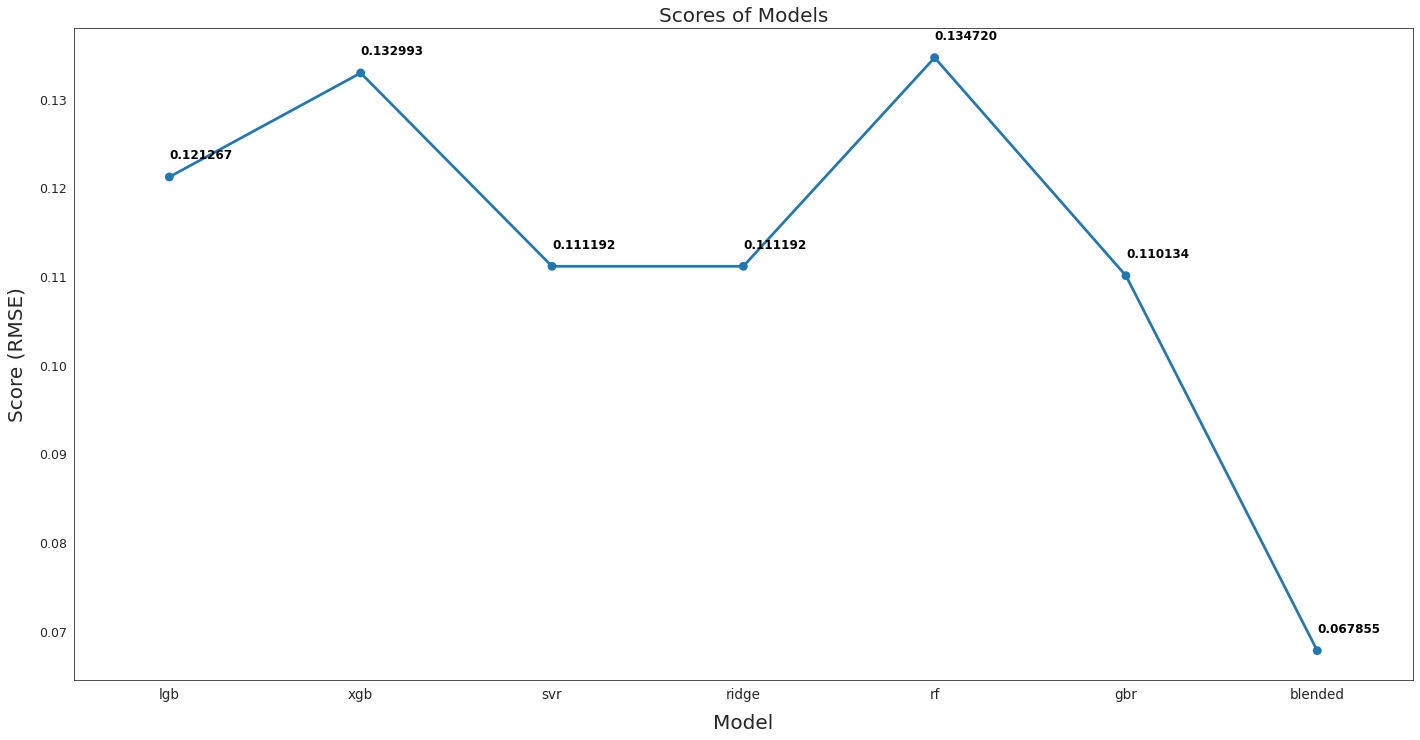

In [102]:
# Plot the predictions for each model
sns.set_style("white")
fig = plt.figure(figsize=(24, 12))

ax = sns.pointplot(x=list(scores.keys()), y=[score for score, _ in scores.values()], markers=['o'], linestyles=['-'])
for i, score in enumerate(scores.values()):
    ax.text(i, score[0] + 0.002, '{:.6f}'.format(score[0]), horizontalalignment='left', size='large', color='black', weight='semibold')

plt.ylabel('Score (RMSE)', size=20, labelpad=12.5)
plt.xlabel('Model', size=20, labelpad=12.5)
plt.tick_params(axis='x', labelsize=13.5)
plt.tick_params(axis='y', labelsize=12.5)

plt.title('Scores of Models', size=20)

plt.show()

In [0]:
submission=pd.read_csv('sample_submission.csv')
submission.shape
submission.iloc[:,1] = np.floor(np.expm1(blended_predictions(X_test)))


In [0]:
submission.to_csv("HousePricePrediction.csv", index=False)